# Imports

In [1]:
import seaborn as sns
import math as math
from random import gauss as gs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import itertools
from pmdarima import auto_arima
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc

#statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from keras.preprocessing.sequence import TimeseriesGenerator
from pathlib import Path
import os
from fbprophet import Prophet

# Functions

In [2]:
def CleanNegatives(df,Tag,CleanName):
    InBlock = False  # Tags that I am inside of a -999 block
    Start = 0
    End   = 0
    Clean = df[Tag]
    for Index in range(len(Clean)):
        if InBlock:
            if Clean[Index] > 0: # Exit condition 
                End = Index
                InBlock = False
                if Start ==0:
                    AVG = Clean[End]
                elif End == len(Clean) - 1:
                    AVG = Clean[Start]
                else:
                    AVG = (Clean[Start-1]+Clean[End])/2
                # Cleaning negatives, replacing by average at the endpoints of the block
                for NewIndex in range(Start,End):
                    Clean[NewIndex] = AVG
        else:  # Not In the block
            if Clean[Index] < 0: # Enter condition
                Start = Index
                InBlock = True
    df[CleanName] = Clean
                

In [3]:
def Cleanup(df,Tag1,Tag2,ResultTag):
    Clean = []
    for i in range(len(df)):
        Value = ( df[Tag1][i] if not math.isnan(df[Tag1][i]) else df[Tag2][i])
        Clean.append(Value)
    df[ResultTag] = Clean

# Cleaning Data

In [4]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [5]:
datapath = Path.cwd() / "data"
print(datapath)

/Users/dc/Desktop/Flatiron/projects/Capstone-Disney-World-Date-and-Attendance-Predictor/data


In [6]:
datasets = os.listdir(datapath)
datasets = list(sorted(datasets))
print(datasets)

['7_dwarfs_train.csv', 'dinosaur.csv', 'entities.csv', 'expedition_everest.csv', 'kilimanjaro_safaris.csv', 'metadata.csv', 'navi_river.csv', 'pirates_of_caribbean.csv', 'rock_n_rollercoaster.csv', 'slinky_dog.csv', 'soarin.csv', 'spaceship_earth.csv', 'splash_mountain.csv', 'touringplans_data_dictionary.xlsx', 'toy_story_mania.csv']


In [7]:
for i in datasets:
    try:
        exec(f"{i.split('.csv')[0]} = pd.read_csv(datapath / i)")
    except:
        print(f"{i} cannot be imported automatically")

7_dwarfs_train.csv cannot be imported automatically
touringplans_data_dictionary.xlsx cannot be imported automatically


In [8]:
seven_dwarfs_train = pd.read_csv(datapath / "7_dwarfs_train.csv")
datasets[0] = "seven_dwarfs_train.csv"

In [9]:
for i in datasets:
    try:
        print(i)
        display(eval(f"{i.split('.csv')[0]}.head()"), eval(f"len({i.split('.csv')[0]})"))
    except:
        pass

seven_dwarfs_train.csv


date             datetime  SACTMIN  SPOSTMIN
0  01/01/2015  2015-01-01 07:51:12      NaN      45.0
1  01/01/2015  2015-01-01 08:02:13      NaN      60.0
2  01/01/2015  2015-01-01 08:05:30     54.0       NaN
3  01/01/2015  2015-01-01 08:09:12      NaN      60.0
4  01/01/2015  2015-01-01 08:16:12      NaN      60.0

321631

dinosaur.csv


date             datetime  SACTMIN  SPOSTMIN
0  01/01/2015  2015-01-01 07:47:26      NaN       5.0
1  01/01/2015  2015-01-01 07:54:23      NaN       5.0
2  01/01/2015  2015-01-01 08:05:33      NaN       5.0
3  01/01/2015  2015-01-01 08:12:23      NaN      10.0
4  01/01/2015  2015-01-01 08:19:26      NaN      10.0

252403

entities.csv


code                                               name  \
0  AK01                            It's Tough to Be a Bug!   
1  AK07                                Kilimanjaro Safaris   
2  AK11  Expedition Everest - Legend of the Forbidden M...   
3  AK14                                  Kali River Rapids   
4  AK18                                           DINOSAUR   

               short_name              land   opened_on  duration  \
0  It's Tough to Be a Bug  Discovery Island  04/22/1998       8.0   
1     Kilimanjaro Safaris            Africa  04/22/1998      20.0   
2      Expedition Everest              Asia  04/07/2006       4.0   
3       Kali River Rapids              Asia  02/15/1999      10.0   
4                DINOSAUR   DinoLand U.S.A.  04/22/1998       3.5   

   average_wait_per_hundred  
0                      12.0  
1                       4.0  
2                       4.0  
3                       5.0  
4                       3.0

95

expedition_everest.csv


date             datetime  SACTMIN  SPOSTMIN
0  01/01/2015  2015-01-01 07:47:26      NaN       5.0
1  01/01/2015  2015-01-01 07:54:23      NaN       5.0
2  01/01/2015  2015-01-01 08:05:33      NaN       5.0
3  01/01/2015  2015-01-01 08:12:23      NaN       5.0
4  01/01/2015  2015-01-01 08:19:26      NaN       5.0

275274

kilimanjaro_safaris.csv


date             datetime  SACTMIN  SPOSTMIN
0  01/01/2015  2015-01-01 07:47:26      NaN       5.0
1  01/01/2015  2015-01-01 07:54:23      NaN       5.0
2  01/01/2015  2015-01-01 08:05:33      NaN       5.0
3  01/01/2015  2015-01-01 08:12:23      NaN      10.0
4  01/01/2015  2015-01-01 08:19:26      NaN      10.0

257785

metadata.csv


DATE WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  \
0  01/01/2015               NaN          5          0           0   
1  01/02/2015               NaN          6          1           0   
2  01/03/2015               NaN          7          2           0   
3  01/04/2015               NaN          1          3           1   
4  01/05/2015               NaN          2          4           1   

   MONTHOFYEAR  YEAR          SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY  \
0            1  2015  CHRISTMAS PEAK          0         5      nyd        1   
1            1  2015       CHRISTMAS          2         5      NaN        0   
2            1  2015       CHRISTMAS          3         0      NaN        0   
3            1  2015       CHRISTMAS          4         0      NaN        0   
4            1  2015       CHRISTMAS          5         0      NaN        0   

  WDWTICKETSEASON WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  \
0             NaN      NaN       NaN         0        0  CHRISTMAS PEAK   
1             NaN      NaN       NaN         0        0       CHRISTMAS   
2             NaN      NaN       NaN         0        0       CHRISTMAS   
3             NaN      NaN       NaN         0        0       CHRISTMAS   
4             NaN      NaN       NaN         0        0       CHRISTMAS   

   WDWMAXTEMP  WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent  \
0       73.02       59.81        66.41      NaN        0      NaN        0   
1       78.00       60.72        69.36      NaN        0      NaN        0   
2       83.12       67.31        75.22      NaN        0      NaN        0   
3       83.93       67.97        75.95      NaN        0      NaN        0   
4       72.30       56.89        64.60      NaN        0      NaN        0   

  HSeventN  HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      NaN        0      NaN        0      NaN        0%                   0%   
1      NaN        0      NaN        0      NaN        0%                   0%   
2      NaN        0      NaN        0      NaN        0%                   0%   
3      NaN        0      NaN        0      NaN       67%                  74%   
4      NaN        0      NaN        0      NaN       67%                  74%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3           77%           74%                74%                70%   
4           77%           74%                74%                70%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                  66%          94%                  68%                 57%   
4                  66%          94%                  68%                 57%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                 56%                70%               79%   
4                 56%                70%               79%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA  \
0                   0%                0%              0%                 0%   
1                   0%                0%              0%                 0%   
2                   0%                0%              0%                 0%   
3                  43%               93%            100%               100%   
4                  43%              

2079

navi_river.csv


date             datetime  SACTMIN  SPOSTMIN
0  05/26/2017  2017-05-26 09:09:46      NaN    -999.0
1  05/26/2017  2017-05-26 09:10:12      NaN       5.0
2  05/26/2017  2017-05-26 09:17:09      NaN      45.0
3  05/26/2017  2017-05-26 09:24:07      NaN      45.0
4  05/26/2017  2017-05-26 09:30:10      NaN      45.0

182121

pirates_of_caribbean.csv


date             datetime  SACTMIN  SPOSTMIN
0  01/01/2015  2015-01-01 08:27:58      NaN    -999.0
1  01/01/2015  2015-01-01 08:56:55      NaN    -999.0
2  01/01/2015  2015-01-01 08:57:38      NaN    -999.0
3  01/01/2015  2015-01-01 08:58:34      NaN    -999.0
4  01/01/2015  2015-01-01 09:24:55      NaN    -999.0

301946

rock_n_rollercoaster.csv


date             datetime  SACTMIN  SPOSTMIN
0  01/01/2015  2015-01-01 07:46:22      NaN       5.0
1  01/01/2015  2015-01-01 07:53:19      NaN       5.0
2  01/01/2015  2015-01-01 08:04:29      NaN      20.0
3  01/01/2015  2015-01-01 08:11:19      NaN      20.0
4  01/01/2015  2015-01-01 08:16:29      NaN      20.0

277509

slinky_dog.csv


date             datetime  SACTMIN  SPOSTMIN
0  06/30/2018  2018-06-30 07:44:06      NaN     270.0
1  06/30/2018  2018-06-30 07:51:06      NaN     270.0
2  06/30/2018  2018-06-30 07:58:07      NaN     270.0
3  06/30/2018  2018-06-30 08:02:08      NaN     270.0
4  06/30/2018  2018-06-30 08:09:06      NaN     270.0

135946

soarin.csv


date             datetime  SACTMIN  SPOSTMIN
0  01/01/2015  2015-01-01 07:45:15      NaN      10.0
1  01/01/2015  2015-01-01 07:52:16      NaN      10.0
2  01/01/2015  2015-01-01 08:03:17      NaN      10.0
3  01/01/2015  2015-01-01 08:10:16      NaN      35.0
4  01/01/2015  2015-01-01 08:17:19      NaN      45.0

274770

spaceship_earth.csv


date             datetime  SACTMIN  SPOSTMIN
0  01/01/2015  2015-01-01 07:45:15      NaN       5.0
1  01/01/2015  2015-01-01 07:52:16      NaN       5.0
2  01/01/2015  2015-01-01 08:38:17      NaN       5.0
3  01/01/2015  2015-01-01 08:45:15      NaN       5.0
4  01/01/2015  2015-01-01 08:52:15      NaN       5.0

277248

splash_mountain.csv


date             datetime  SACTMIN  SPOSTMIN
0  01/01/2015  2015-01-01 07:51:12      NaN       5.0
1  01/01/2015  2015-01-01 08:02:13      NaN       5.0
2  01/01/2015  2015-01-01 08:09:12      NaN       5.0
3  01/01/2015  2015-01-01 08:16:12      NaN       5.0
4  01/01/2015  2015-01-01 08:23:12      NaN       5.0

287948

touringplans_data_dictionary.xlsx
toy_story_mania.csv


date             datetime  SACTMIN  SPOSTMIN
0  01/01/2015  2015-01-01 07:51:16      NaN      20.0
1  01/01/2015  2015-01-01 07:53:19      NaN      20.0
2  01/01/2015  2015-01-01 08:04:29      NaN      30.0
3  01/01/2015  2015-01-01 08:11:19      NaN      30.0
4  01/01/2015  2015-01-01 08:12:31      NaN      40.0

284170

In [10]:
# print(sorted(dinosaur["SACTMIN"].unique()))

In [11]:
# print(sorted(dinosaur["SPOSTMIN"].unique()))

In [12]:
# print(dinosaur.dtypes)

In [13]:
print(datasets)
data_sets = [i.split(".csv")[0] for i in datasets if ".csv" in i and "entities" not in i and "metadata" not in i]
print(data_sets)

['seven_dwarfs_train.csv', 'dinosaur.csv', 'entities.csv', 'expedition_everest.csv', 'kilimanjaro_safaris.csv', 'metadata.csv', 'navi_river.csv', 'pirates_of_caribbean.csv', 'rock_n_rollercoaster.csv', 'slinky_dog.csv', 'soarin.csv', 'spaceship_earth.csv', 'splash_mountain.csv', 'touringplans_data_dictionary.xlsx', 'toy_story_mania.csv']
['seven_dwarfs_train', 'dinosaur', 'expedition_everest', 'kilimanjaro_safaris', 'navi_river', 'pirates_of_caribbean', 'rock_n_rollercoaster', 'slinky_dog', 'soarin', 'spaceship_earth', 'splash_mountain', 'toy_story_mania']


### Merging with metadata

In [14]:
for i in data_sets: 
    print(i)
    exec(f'{i}_data = {i}.merge(metadata, how= "left", left_on= "date", right_on= "DATE")')
    print(eval(f"len({i}_data)"))

seven_dwarfs_train
321631
dinosaur
252403
expedition_everest
275274
kilimanjaro_safaris
257785
navi_river
182121
pirates_of_caribbean
301946
rock_n_rollercoaster
277509
slinky_dog
135946
soarin
274770
spaceship_earth
277248
splash_mountain
287948
toy_story_mania
284170


In [15]:
# dinosaur_data = dinosaur.merge(metadata, how= "left", left_on= "date", right_on= "DATE")
# display(dinosaur_data.head())
# print(len(dinosaur_data))

### Cleaning -999 Values

In [16]:
for i in data_sets: 
    print(i)
    exec(f"CleanNegatives({i}_data,'SPOSTMIN','SPOSTMINClean')")
    display(eval(f"{i}_data.head()"))

seven_dwarfs_train


<ipython-input-2-a4f54c8aedc8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean[NewIndex] = AVG


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:51:12      NaN      45.0  01/01/2015   
1  01/01/2015  2015-01-01 08:02:13      NaN      60.0  01/01/2015   
2  01/01/2015  2015-01-01 08:05:30     54.0       NaN  01/01/2015   
3  01/01/2015  2015-01-01 08:09:12      NaN      60.0  01/01/2015   
4  01/01/2015  2015-01-01 08:16:12      NaN      60.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

dinosaur


<ipython-input-2-a4f54c8aedc8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean[NewIndex] = AVG


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:47:26      NaN       5.0  01/01/2015   
1  01/01/2015  2015-01-01 07:54:23      NaN       5.0  01/01/2015   
2  01/01/2015  2015-01-01 08:05:33      NaN       5.0  01/01/2015   
3  01/01/2015  2015-01-01 08:12:23      NaN      10.0  01/01/2015   
4  01/01/2015  2015-01-01 08:19:26      NaN      10.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

expedition_everest


<ipython-input-2-a4f54c8aedc8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean[NewIndex] = AVG


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:47:26      NaN       5.0  01/01/2015   
1  01/01/2015  2015-01-01 07:54:23      NaN       5.0  01/01/2015   
2  01/01/2015  2015-01-01 08:05:33      NaN       5.0  01/01/2015   
3  01/01/2015  2015-01-01 08:12:23      NaN       5.0  01/01/2015   
4  01/01/2015  2015-01-01 08:19:26      NaN       5.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

kilimanjaro_safaris


<ipython-input-2-a4f54c8aedc8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean[NewIndex] = AVG


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:47:26      NaN       5.0  01/01/2015   
1  01/01/2015  2015-01-01 07:54:23      NaN       5.0  01/01/2015   
2  01/01/2015  2015-01-01 08:05:33      NaN       5.0  01/01/2015   
3  01/01/2015  2015-01-01 08:12:23      NaN      10.0  01/01/2015   
4  01/01/2015  2015-01-01 08:19:26      NaN      10.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

navi_river


<ipython-input-2-a4f54c8aedc8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean[NewIndex] = AVG


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  05/26/2017  2017-05-26 09:09:46      NaN       5.0  05/26/2017   
1  05/26/2017  2017-05-26 09:10:12      NaN       5.0  05/26/2017   
2  05/26/2017  2017-05-26 09:17:09      NaN      45.0  05/26/2017   
3  05/26/2017  2017-05-26 09:24:07      NaN      45.0  05/26/2017   
4  05/26/2017  2017-05-26 09:30:10      NaN      45.0  05/26/2017   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0              peak        6.0      145.0        21.0          5.0  2017.0   
1              peak        6.0      145.0        21.0          5.0  2017.0   
2              peak        6.0      145.0        21.0          5.0  2017.0   
3              peak        6.0      145.0        21.0          5.0  2017.0   
4              peak        6.0      145.0        21.0          5.0  2017.0   

   SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON WDWRaceN  \
0  SPRING        4.0       3.0      NaN      0.0            peak      NaN   
1  SPRING        4.0       3.0      NaN      0.0            peak      NaN   
2  SPRING        4.0       3.0      NaN      0.0            peak      NaN   
3  SPRING        4.0       3.0      NaN      0.0            peak      NaN   
4  SPRING        4.0       3.0      NaN      0.0            peak      NaN   

  WDWeventN  WDWevent  WDWrace WDWSEASON  WDWMAXTEMP  WDWMINTEMP  WDWMEANTEMP  \
0       NaN       0.0      0.0    SPRING       89.33       60.52        74.93   
1       NaN       0.0      0.0    SPRING       89.33       60.52        74.93   
2       NaN       0.0      0.0    SPRING       89.33       60.52        74.93   
3       NaN       0.0      0.0    SPRING       89.33       60.52        74.93   
4       NaN       0.0      0.0    SPRING       89.33       60.52        74.93   

  MKeventN  MKevent EPeventN  EPevent HSeventN  HSevent AKeventN  AKevent  \
0      NaN      0.0     epfg      1.0      NaN      0.0      NaN      0.0   
1      NaN      0.0     epfg      1.0      NaN      0.0      NaN      0.0   
2      NaN      0.0     epfg      1.0      NaN      0.0      NaN      0.0   
3      NaN      0.0     epfg      1.0      NaN      0.0      NaN      0.0   
4      NaN      0.0     epfg      1.0      NaN      0.0      NaN      0.0   

  HOLIDAYJ inSession inSession_Enrollment inSession_wdw inSession_dlr  \
0      NaN       72%                  74%           83%           80%   
1      NaN       72%                  74%           83%           80%   
2      NaN       72%                  74%           83%           80%   
3      NaN       72%                  74%           83%           80%   
4      NaN       72%                  74%           83%           80%   

  inSession_sqrt_WDW inSession_sqrt_DLR inSession_California inSession_DC  \
0                77%                74%                  75%          77%   
1                77%                74%                  75%          77%   
2                77%                74%                  75%          77%   
3                77%                74%                  75%          77%   
4                77%                74%                  75%          77%   

  inSession_Central_FL inSession_Drive1_FL inSession_Drive2_FL  \
0                  80%                 69%                 69%   
1                  80%                 69%                 69%   
2                  80%                 69%                 69%   
3                  80%                 69%                 69%   
4                  80%                 69%                 69%   

  inSession_Drive_CA inSession_Florida inSession_Mardi_Gras inSession_Midwest  \
0                73%               86%                  71%               52%   
1                73%               86%                  71%               52%   
2                73%               86%                  71%               52%   
3                73%               86%                  71%               52%   
4       

pirates_of_caribbean


<ipython-input-2-a4f54c8aedc8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean[NewIndex] = AVG


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 08:27:58      NaN      10.0  01/01/2015   
1  01/01/2015  2015-01-01 08:56:55      NaN      10.0  01/01/2015   
2  01/01/2015  2015-01-01 08:57:38      NaN      10.0  01/01/2015   
3  01/01/2015  2015-01-01 08:58:34      NaN      10.0  01/01/2015   
4  01/01/2015  2015-01-01 09:24:55      NaN      10.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

rock_n_rollercoaster


<ipython-input-2-a4f54c8aedc8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean[NewIndex] = AVG


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:46:22      NaN       5.0  01/01/2015   
1  01/01/2015  2015-01-01 07:53:19      NaN       5.0  01/01/2015   
2  01/01/2015  2015-01-01 08:04:29      NaN      20.0  01/01/2015   
3  01/01/2015  2015-01-01 08:11:19      NaN      20.0  01/01/2015   
4  01/01/2015  2015-01-01 08:16:29      NaN      20.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

slinky_dog


<ipython-input-2-a4f54c8aedc8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean[NewIndex] = AVG


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  06/30/2018  2018-06-30 07:44:06      NaN     270.0  06/30/2018   
1  06/30/2018  2018-06-30 07:51:06      NaN     270.0  06/30/2018   
2  06/30/2018  2018-06-30 07:58:07      NaN     270.0  06/30/2018   
3  06/30/2018  2018-06-30 08:02:08      NaN     270.0  06/30/2018   
4  06/30/2018  2018-06-30 08:09:06      NaN     270.0  06/30/2018   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0              peak        7.0      180.0        25.0          6.0  2018.0   
1              peak        7.0      180.0        25.0          6.0  2018.0   
2              peak        7.0      180.0        25.0          6.0  2018.0   
3              peak        7.0      180.0        25.0          6.0  2018.0   
4              peak        7.0      180.0        25.0          6.0  2018.0   

   SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON WDWRaceN  \
0  SPRING        5.0       0.0      NaN      0.0            peak      NaN   
1  SPRING        5.0       0.0      NaN      0.0            peak      NaN   
2  SPRING        5.0       0.0      NaN      0.0            peak      NaN   
3  SPRING        5.0       0.0      NaN      0.0            peak      NaN   
4  SPRING        5.0       0.0      NaN      0.0            peak      NaN   

  WDWeventN  WDWevent  WDWrace WDWSEASON  WDWMAXTEMP  WDWMINTEMP  WDWMEANTEMP  \
0       NaN       0.0      0.0    SPRING       85.29       73.59        79.44   
1       NaN       0.0      0.0    SPRING       85.29       73.59        79.44   
2       NaN       0.0      0.0    SPRING       85.29       73.59        79.44   
3       NaN       0.0      0.0    SPRING       85.29       73.59        79.44   
4       NaN       0.0      0.0    SPRING       85.29       73.59        79.44   

  MKeventN  MKevent EPeventN  EPevent HSeventN  HSevent AKeventN  AKevent  \
0      dah      1.0      NaN      0.0      NaN      0.0      NaN      0.0   
1      dah      1.0      NaN      0.0      NaN      0.0      NaN      0.0   
2      dah      1.0      NaN      0.0      NaN      0.0      NaN      0.0   
3      dah      1.0      NaN      0.0      NaN      0.0      NaN      0.0   
4      dah      1.0      NaN      0.0      NaN      0.0      NaN      0.0   

  HOLIDAYJ inSession inSession_Enrollment inSession_wdw inSession_dlr  \
0      NaN        8%                   2%            1%            2%   
1      NaN        8%                   2%            1%            2%   
2      NaN        8%                   2%            1%            2%   
3      NaN        8%                   2%            1%            2%   
4      NaN        8%                   2%            1%            2%   

  inSession_sqrt_WDW inSession_sqrt_DLR inSession_California inSession_DC  \
0                 1%                 2%                   6%           0%   
1                 1%                 2%                   6%           0%   
2                 1%                 2%                   6%           0%   
3                 1%                 2%                   6%           0%   
4                 1%                 2%                   6%           0%   

  inSession_Central_FL inSession_Drive1_FL inSession_Drive2_FL  \
0                   0%                  0%                  1%   
1                   0%                  0%                  1%   
2                   0%                  0%                  1%   
3                   0%                  0%                  1%   
4                   0%                  0%                  1%   

  inSession_Drive_CA inSession_Florida inSession_Mardi_Gras inSession_Midwest  \
0                 4%                0%                   0%                0%   
1                 4%                0%                   0%                0%   
2                 4%                0%                   0%                0%   
3                 4%                0%                   0%                0%   
4       

soarin


<ipython-input-2-a4f54c8aedc8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean[NewIndex] = AVG


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:45:15      NaN      10.0  01/01/2015   
1  01/01/2015  2015-01-01 07:52:16      NaN      10.0  01/01/2015   
2  01/01/2015  2015-01-01 08:03:17      NaN      10.0  01/01/2015   
3  01/01/2015  2015-01-01 08:10:16      NaN      35.0  01/01/2015   
4  01/01/2015  2015-01-01 08:17:19      NaN      45.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

spaceship_earth


<ipython-input-2-a4f54c8aedc8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean[NewIndex] = AVG


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:45:15      NaN       5.0  01/01/2015   
1  01/01/2015  2015-01-01 07:52:16      NaN       5.0  01/01/2015   
2  01/01/2015  2015-01-01 08:38:17      NaN       5.0  01/01/2015   
3  01/01/2015  2015-01-01 08:45:15      NaN       5.0  01/01/2015   
4  01/01/2015  2015-01-01 08:52:15      NaN       5.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

splash_mountain


<ipython-input-2-a4f54c8aedc8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean[NewIndex] = AVG


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:51:12      NaN       5.0  01/01/2015   
1  01/01/2015  2015-01-01 08:02:13      NaN       5.0  01/01/2015   
2  01/01/2015  2015-01-01 08:09:12      NaN       5.0  01/01/2015   
3  01/01/2015  2015-01-01 08:16:12      NaN       5.0  01/01/2015   
4  01/01/2015  2015-01-01 08:23:12      NaN       5.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

toy_story_mania


<ipython-input-2-a4f54c8aedc8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean[NewIndex] = AVG


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:51:16      NaN      20.0  01/01/2015   
1  01/01/2015  2015-01-01 07:53:19      NaN      20.0  01/01/2015   
2  01/01/2015  2015-01-01 08:04:29      NaN      30.0  01/01/2015   
3  01/01/2015  2015-01-01 08:11:19      NaN      30.0  01/01/2015   
4  01/01/2015  2015-01-01 08:12:31      NaN      40.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

### Merging Wait Time Columns

In [17]:
for i in data_sets: 
    print(i)
    exec(f"Cleanup({i}_data,'SACTMIN','SPOSTMINClean','CleanTime')")
    display(eval(f"{i}_data.head()"))

seven_dwarfs_train


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:51:12      NaN      45.0  01/01/2015   
1  01/01/2015  2015-01-01 08:02:13      NaN      60.0  01/01/2015   
2  01/01/2015  2015-01-01 08:05:30     54.0       NaN  01/01/2015   
3  01/01/2015  2015-01-01 08:09:12      NaN      60.0  01/01/2015   
4  01/01/2015  2015-01-01 08:16:12      NaN      60.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

dinosaur


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:47:26      NaN       5.0  01/01/2015   
1  01/01/2015  2015-01-01 07:54:23      NaN       5.0  01/01/2015   
2  01/01/2015  2015-01-01 08:05:33      NaN       5.0  01/01/2015   
3  01/01/2015  2015-01-01 08:12:23      NaN      10.0  01/01/2015   
4  01/01/2015  2015-01-01 08:19:26      NaN      10.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

expedition_everest


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:47:26      NaN       5.0  01/01/2015   
1  01/01/2015  2015-01-01 07:54:23      NaN       5.0  01/01/2015   
2  01/01/2015  2015-01-01 08:05:33      NaN       5.0  01/01/2015   
3  01/01/2015  2015-01-01 08:12:23      NaN       5.0  01/01/2015   
4  01/01/2015  2015-01-01 08:19:26      NaN       5.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

kilimanjaro_safaris


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:47:26      NaN       5.0  01/01/2015   
1  01/01/2015  2015-01-01 07:54:23      NaN       5.0  01/01/2015   
2  01/01/2015  2015-01-01 08:05:33      NaN       5.0  01/01/2015   
3  01/01/2015  2015-01-01 08:12:23      NaN      10.0  01/01/2015   
4  01/01/2015  2015-01-01 08:19:26      NaN      10.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

navi_river


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  05/26/2017  2017-05-26 09:09:46      NaN       5.0  05/26/2017   
1  05/26/2017  2017-05-26 09:10:12      NaN       5.0  05/26/2017   
2  05/26/2017  2017-05-26 09:17:09      NaN      45.0  05/26/2017   
3  05/26/2017  2017-05-26 09:24:07      NaN      45.0  05/26/2017   
4  05/26/2017  2017-05-26 09:30:10      NaN      45.0  05/26/2017   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0              peak        6.0      145.0        21.0          5.0  2017.0   
1              peak        6.0      145.0        21.0          5.0  2017.0   
2              peak        6.0      145.0        21.0          5.0  2017.0   
3              peak        6.0      145.0        21.0          5.0  2017.0   
4              peak        6.0      145.0        21.0          5.0  2017.0   

   SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON WDWRaceN  \
0  SPRING        4.0       3.0      NaN      0.0            peak      NaN   
1  SPRING        4.0       3.0      NaN      0.0            peak      NaN   
2  SPRING        4.0       3.0      NaN      0.0            peak      NaN   
3  SPRING        4.0       3.0      NaN      0.0            peak      NaN   
4  SPRING        4.0       3.0      NaN      0.0            peak      NaN   

  WDWeventN  WDWevent  WDWrace WDWSEASON  WDWMAXTEMP  WDWMINTEMP  WDWMEANTEMP  \
0       NaN       0.0      0.0    SPRING       89.33       60.52        74.93   
1       NaN       0.0      0.0    SPRING       89.33       60.52        74.93   
2       NaN       0.0      0.0    SPRING       89.33       60.52        74.93   
3       NaN       0.0      0.0    SPRING       89.33       60.52        74.93   
4       NaN       0.0      0.0    SPRING       89.33       60.52        74.93   

  MKeventN  MKevent EPeventN  EPevent HSeventN  HSevent AKeventN  AKevent  \
0      NaN      0.0     epfg      1.0      NaN      0.0      NaN      0.0   
1      NaN      0.0     epfg      1.0      NaN      0.0      NaN      0.0   
2      NaN      0.0     epfg      1.0      NaN      0.0      NaN      0.0   
3      NaN      0.0     epfg      1.0      NaN      0.0      NaN      0.0   
4      NaN      0.0     epfg      1.0      NaN      0.0      NaN      0.0   

  HOLIDAYJ inSession inSession_Enrollment inSession_wdw inSession_dlr  \
0      NaN       72%                  74%           83%           80%   
1      NaN       72%                  74%           83%           80%   
2      NaN       72%                  74%           83%           80%   
3      NaN       72%                  74%           83%           80%   
4      NaN       72%                  74%           83%           80%   

  inSession_sqrt_WDW inSession_sqrt_DLR inSession_California inSession_DC  \
0                77%                74%                  75%          77%   
1                77%                74%                  75%          77%   
2                77%                74%                  75%          77%   
3                77%                74%                  75%          77%   
4                77%                74%                  75%          77%   

  inSession_Central_FL inSession_Drive1_FL inSession_Drive2_FL  \
0                  80%                 69%                 69%   
1                  80%                 69%                 69%   
2                  80%                 69%                 69%   
3                  80%                 69%                 69%   
4                  80%                 69%                 69%   

  inSession_Drive_CA inSession_Florida inSession_Mardi_Gras inSession_Midwest  \
0                73%               86%                  71%               52%   
1                73%               86%                  71%               52%   
2                73%               86%                  71%               52%   
3                73%               86%                  71%               52%   
4       

pirates_of_caribbean


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 08:27:58      NaN      10.0  01/01/2015   
1  01/01/2015  2015-01-01 08:56:55      NaN      10.0  01/01/2015   
2  01/01/2015  2015-01-01 08:57:38      NaN      10.0  01/01/2015   
3  01/01/2015  2015-01-01 08:58:34      NaN      10.0  01/01/2015   
4  01/01/2015  2015-01-01 09:24:55      NaN      10.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

rock_n_rollercoaster


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:46:22      NaN       5.0  01/01/2015   
1  01/01/2015  2015-01-01 07:53:19      NaN       5.0  01/01/2015   
2  01/01/2015  2015-01-01 08:04:29      NaN      20.0  01/01/2015   
3  01/01/2015  2015-01-01 08:11:19      NaN      20.0  01/01/2015   
4  01/01/2015  2015-01-01 08:16:29      NaN      20.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

slinky_dog


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  06/30/2018  2018-06-30 07:44:06      NaN     270.0  06/30/2018   
1  06/30/2018  2018-06-30 07:51:06      NaN     270.0  06/30/2018   
2  06/30/2018  2018-06-30 07:58:07      NaN     270.0  06/30/2018   
3  06/30/2018  2018-06-30 08:02:08      NaN     270.0  06/30/2018   
4  06/30/2018  2018-06-30 08:09:06      NaN     270.0  06/30/2018   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0              peak        7.0      180.0        25.0          6.0  2018.0   
1              peak        7.0      180.0        25.0          6.0  2018.0   
2              peak        7.0      180.0        25.0          6.0  2018.0   
3              peak        7.0      180.0        25.0          6.0  2018.0   
4              peak        7.0      180.0        25.0          6.0  2018.0   

   SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON WDWRaceN  \
0  SPRING        5.0       0.0      NaN      0.0            peak      NaN   
1  SPRING        5.0       0.0      NaN      0.0            peak      NaN   
2  SPRING        5.0       0.0      NaN      0.0            peak      NaN   
3  SPRING        5.0       0.0      NaN      0.0            peak      NaN   
4  SPRING        5.0       0.0      NaN      0.0            peak      NaN   

  WDWeventN  WDWevent  WDWrace WDWSEASON  WDWMAXTEMP  WDWMINTEMP  WDWMEANTEMP  \
0       NaN       0.0      0.0    SPRING       85.29       73.59        79.44   
1       NaN       0.0      0.0    SPRING       85.29       73.59        79.44   
2       NaN       0.0      0.0    SPRING       85.29       73.59        79.44   
3       NaN       0.0      0.0    SPRING       85.29       73.59        79.44   
4       NaN       0.0      0.0    SPRING       85.29       73.59        79.44   

  MKeventN  MKevent EPeventN  EPevent HSeventN  HSevent AKeventN  AKevent  \
0      dah      1.0      NaN      0.0      NaN      0.0      NaN      0.0   
1      dah      1.0      NaN      0.0      NaN      0.0      NaN      0.0   
2      dah      1.0      NaN      0.0      NaN      0.0      NaN      0.0   
3      dah      1.0      NaN      0.0      NaN      0.0      NaN      0.0   
4      dah      1.0      NaN      0.0      NaN      0.0      NaN      0.0   

  HOLIDAYJ inSession inSession_Enrollment inSession_wdw inSession_dlr  \
0      NaN        8%                   2%            1%            2%   
1      NaN        8%                   2%            1%            2%   
2      NaN        8%                   2%            1%            2%   
3      NaN        8%                   2%            1%            2%   
4      NaN        8%                   2%            1%            2%   

  inSession_sqrt_WDW inSession_sqrt_DLR inSession_California inSession_DC  \
0                 1%                 2%                   6%           0%   
1                 1%                 2%                   6%           0%   
2                 1%                 2%                   6%           0%   
3                 1%                 2%                   6%           0%   
4                 1%                 2%                   6%           0%   

  inSession_Central_FL inSession_Drive1_FL inSession_Drive2_FL  \
0                   0%                  0%                  1%   
1                   0%                  0%                  1%   
2                   0%                  0%                  1%   
3                   0%                  0%                  1%   
4                   0%                  0%                  1%   

  inSession_Drive_CA inSession_Florida inSession_Mardi_Gras inSession_Midwest  \
0                 4%                0%                   0%                0%   
1                 4%                0%                   0%                0%   
2                 4%                0%                   0%                0%   
3                 4%                0%                   0%                0%   
4       

soarin


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:45:15      NaN      10.0  01/01/2015   
1  01/01/2015  2015-01-01 07:52:16      NaN      10.0  01/01/2015   
2  01/01/2015  2015-01-01 08:03:17      NaN      10.0  01/01/2015   
3  01/01/2015  2015-01-01 08:10:16      NaN      35.0  01/01/2015   
4  01/01/2015  2015-01-01 08:17:19      NaN      45.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

spaceship_earth


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:45:15      NaN       5.0  01/01/2015   
1  01/01/2015  2015-01-01 07:52:16      NaN       5.0  01/01/2015   
2  01/01/2015  2015-01-01 08:38:17      NaN       5.0  01/01/2015   
3  01/01/2015  2015-01-01 08:45:15      NaN       5.0  01/01/2015   
4  01/01/2015  2015-01-01 08:52:15      NaN       5.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

splash_mountain


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:51:12      NaN       5.0  01/01/2015   
1  01/01/2015  2015-01-01 08:02:13      NaN       5.0  01/01/2015   
2  01/01/2015  2015-01-01 08:09:12      NaN       5.0  01/01/2015   
3  01/01/2015  2015-01-01 08:16:12      NaN       5.0  01/01/2015   
4  01/01/2015  2015-01-01 08:23:12      NaN       5.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

toy_story_mania


date             datetime  SACTMIN  SPOSTMIN        DATE  \
0  01/01/2015  2015-01-01 07:51:16      NaN      20.0  01/01/2015   
1  01/01/2015  2015-01-01 07:53:19      NaN      20.0  01/01/2015   
2  01/01/2015  2015-01-01 08:04:29      NaN      30.0  01/01/2015   
3  01/01/2015  2015-01-01 08:11:19      NaN      30.0  01/01/2015   
4  01/01/2015  2015-01-01 08:12:31      NaN      40.0  01/01/2015   

  WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR    YEAR  \
0               NaN        5.0        0.0         0.0          1.0  2015.0   
1               NaN        5.0        0.0         0.0          1.0  2015.0   
2               NaN        5.0        0.0         0.0          1.0  2015.0   
3               NaN        5.0        0.0         0.0          1.0  2015.0   
4               NaN        5.0        0.0         0.0          1.0  2015.0   

           SEASON  HOLIDAYPX  HOLIDAYM HOLIDAYN  HOLIDAY WDWTICKETSEASON  \
0  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
1  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
2  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
3  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   
4  CHRISTMAS PEAK        0.0       5.0      nyd      1.0             NaN   

  WDWRaceN WDWeventN  WDWevent  WDWrace       WDWSEASON  WDWMAXTEMP  \
0      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
1      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
2      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
3      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   
4      NaN       NaN       0.0      0.0  CHRISTMAS PEAK       73.02   

   WDWMINTEMP  WDWMEANTEMP MKeventN  MKevent EPeventN  EPevent HSeventN  \
0       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
1       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
2       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
3       59.81        66.41      NaN      0.0      NaN      0.0      NaN   
4       59.81        66.41      NaN      0.0      NaN      0.0      NaN   

   HSevent AKeventN  AKevent HOLIDAYJ inSession inSession_Enrollment  \
0      0.0      NaN      0.0      NaN        0%                   0%   
1      0.0      NaN      0.0      NaN        0%                   0%   
2      0.0      NaN      0.0      NaN        0%                   0%   
3      0.0      NaN      0.0      NaN        0%                   0%   
4      0.0      NaN      0.0      NaN        0%                   0%   

  inSession_wdw inSession_dlr inSession_sqrt_WDW inSession_sqrt_DLR  \
0            0%            0%                 0%                 0%   
1            0%            0%                 0%                 0%   
2            0%            0%                 0%                 0%   
3            0%            0%                 0%                 0%   
4            0%            0%                 0%                 0%   

  inSession_California inSession_DC inSession_Central_FL inSession_Drive1_FL  \
0                   0%           0%                   0%                  0%   
1                   0%           0%                   0%                  0%   
2                   0%           0%                   0%                  0%   
3                   0%           0%                   0%                  0%   
4                   0%           0%                   0%                  0%   

  inSession_Drive2_FL inSession_Drive_CA inSession_Florida  \
0                  0%                 0%                0%   
1                  0%                 0%                0%   
2                  0%                 0%                0%   
3                  0%                 0%                0%   
4                  0%                 0%                0%   

  inSession_Mardi_Gras inSession_Midwest inSession_NY_NJ inSession_NY_NJ_PA 

### Dropping negative values

In [18]:
for i in data_sets: 
    print(i)
    exec(f'{i}_data[{i}_data.CleanTime < 0]')
    exec(f'{i}_data = {i}_data[{i}_data["CleanTime"] >= 0]')
    

seven_dwarfs_train
dinosaur
expedition_everest
kilimanjaro_safaris
navi_river
pirates_of_caribbean
rock_n_rollercoaster
slinky_dog
soarin
spaceship_earth
splash_mountain
toy_story_mania


In [19]:
expedition_everest_data[expedition_everest_data.CleanTime < 0]

Empty DataFrame
Columns: [date, datetime, SACTMIN, SPOSTMIN, DATE, WDW_TICKET_SEASON, DAYOFWEEK, DAYOFYEAR, WEEKOFYEAR, MONTHOFYEAR, YEAR, SEASON, HOLIDAYPX, HOLIDAYM, HOLIDAYN, HOLIDAY, WDWTICKETSEASON, WDWRaceN, WDWeventN, WDWevent, WDWrace, WDWSEASON, WDWMAXTEMP, WDWMINTEMP, WDWMEANTEMP, MKeventN, MKevent, EPeventN, EPevent, HSeventN, HSevent, AKeventN, AKevent, HOLIDAYJ, inSession, inSession_Enrollment, inSession_wdw, inSession_dlr, inSession_sqrt_WDW, inSession_sqrt_DLR, inSession_California, inSession_DC, inSession_Central_FL, inSession_Drive1_FL, inSession_Drive2_FL, inSession_Drive_CA, inSession_Florida, inSession_Mardi_Gras, inSession_Midwest, inSession_NY_NJ, inSession_NY_NJ_PA, inSession_New_England, inSession_New_Jersey, inSession_Nothwest, INSESSION_PLANES, inSession_SoCal, inSession_Southwest, MKEMHMORN, MKEMHMYEST, MKEMHMTOM, MKEMHEVE, MKHOURSEMH, MKHOURSEMHYEST, MKHOURSEMHTOM, MKEMHEYEST, MKEMHETOM, EPEMHMORN, EPEMHMYEST, EPEMHMTOM, EPEMHEVE, EPEMHEYEST, EPEMHETOM, EPHOURSEMH, EPHOURSEMHYEST, EPHOURSEMHTOM, HSEMHMORN, HSEMHMYEST, HSEMHMTOM, HSEMHEVE, HSEMHEYEST, HSEMHETOM, HSHOURSEMH, HSHOURSEMHYEST, HSHOURSEMHTOM, AKEMHMORN, AKEMHMYEST, AKEMHMTOM, AKEMHEVE, AKEMHEYEST, AKEMHETOM, AKHOURSEMH, AKHOURSEMHYEST, AKHOURSEMHTOM, MKOPEN, MKCLOSE, MKHOURS, MKEMHOPEN, MKEMHCLOSE, MKOPENYEST, MKCLOSEYEST, ...]
Index: []

In [20]:
expedition_everest_data['CleanTime'].isna().sum()

0

In [21]:
# expedition_everest_data = expedition_everest_data['CleanTime'].dropna()

### Dropping NaNs

In [22]:
for i in data_sets: 
    print(i)
    exec(f"{i}_data['CleanTime'] = {i}_data['CleanTime'].dropna()")

seven_dwarfs_train
dinosaur
expedition_everest
kilimanjaro_safaris
navi_river
pirates_of_caribbean
rock_n_rollercoaster
slinky_dog
soarin
spaceship_earth
splash_mountain
toy_story_mania


In [23]:
expedition_everest_data.isna().sum()

date                          0
datetime                      0
SACTMIN                  266517
SPOSTMIN                   8673
DATE                      37456
WDW_TICKET_SEASON        128520
DAYOFWEEK                 37456
DAYOFYEAR                 37456
WEEKOFYEAR                37456
MONTHOFYEAR               37456
YEAR                      37456
SEASON                    64327
HOLIDAYPX                 37456
HOLIDAYM                  37456
HOLIDAYN                 250761
HOLIDAY                   37456
WDWTICKETSEASON          117577
WDWRaceN                 265774
WDWeventN                247422
WDWevent                  37456
WDWrace                   37456
WDWSEASON                 45842
WDWMAXTEMP                37992
WDWMINTEMP                38079
WDWMEANTEMP               38079
MKeventN                 214940
MKevent                   37456
EPeventN                 137907
EPevent                   37456
HSeventN                 251011
HSevent                   37456
AKeventN

In [24]:
# seven_dwarfs_train_data = seven_dwarfs_train_data[seven_dwarfs_train_data['CleanTime'] >= 0]

In [25]:
# seven_dwarfs_train_data[seven_dwarfs_train_data.CleanTime < 0]

In [26]:
# CleanNegatives(dinosaur_data,'SPOSTMIN','SPOSTMINClean')
# display(dinosaur_data.head())

In [27]:
# Cleanup(dinosaur_data,'SACTMIN','SPOSTMINClean','CleanTime')
# display(dinosaur_data.head())

In [28]:
# dinosaur_data.head()

In [29]:
# dinosaur_data.fillna(-1, inplace=True)
# display(dinosaur_data.head())

In [30]:
# dinosaur_data.drop(columns = ["SACTMIN", "SPOSTMIN", "DATE", "SPOSTMINClean"], inplace=True)

In [31]:
# dtypes = dinosaur_data.dtypes
# print(dtypes)

In [32]:
# print(str(dinosaur_data.dtypes["date"]))
# cols = []
# for i, j in enumerate(dtypes):
#     if str(j) != "float64":
#         cols.append(dinosaur_data.dtypes.index[i])
# print(cols)

In [33]:
# def encode_labels(col):
#     le = LabelEncoder()
#     le.fit(col)
#     col = le.transform(col)
#     return col, le

In [34]:
# for i in range(2, len(cols)):
#     dinosaur_data[cols[i]] = dinosaur_data[cols[i]].astype(str)
#     dinosaur_data[cols[i]], _ = encode_labels(dinosaur_data[cols[i]])

In [35]:
# display(dinosaur_data.head())

In [36]:
# X = dinosaur_data.drop(columns = ["date", "datetime"])
# y = dinosaur_data["CleanTime"]

# Facebook Prophet Analysis

### Converting to datetime

In [37]:
for i in data_sets:
    exec(f"{i}_data['datetime'] = pd.to_datetime({i}_data.datetime)")
    exec(f"{i}_data.set_index('datetime', inplace=True)")


In [38]:
# dinosaur_data['datetime'] = pd.to_datetime(dinosaur_data.datetime)
# dinosaur_data.set_index('datetime', inplace=True)


### Resampling Data to Daily

In [39]:
for i in data_sets:
    print(i)
    exec(f"{i}_data = {i}_data.resample('D').mean()")
    exec(f"{i}_data = {i}_data.loc['2015-01-01 07:51:12':'2019-12-31 23:55:02']")
    exec(f"display({i}_data.head())")

seven_dwarfs_train


SACTMIN    SPOSTMIN  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  \
datetime                                                            
2015-01-02   112.50  113.000000   5.940789   0.940789    0.000000   
2015-01-03    41.75  102.304688   6.962121   1.962121    0.000000   
2015-01-04    15.00   80.720000   1.566929   2.905512    0.905512   
2015-01-05      NaN   87.370690   1.991379   3.991379    1.000000   
2015-01-06    22.00   79.615385   3.000000   5.000000    1.000000   

            MONTHOFYEAR    YEAR  HOLIDAYPX  HOLIDAYM   HOLIDAY  WDWevent  \
datetime                                                                   
2015-01-02          1.0  2015.0   1.881579  5.000000  0.059211       0.0   
2015-01-03          1.0  2015.0   2.962121  0.189394  0.000000       0.0   
2015-01-04          1.0  2015.0   3.905512  0.000000  0.000000       0.0   
2015-01-05          1.0  2015.0   4.991379  0.000000  0.000000       0.0   
2015-01-06          1.0  2015.0   6.000000  0.000000  0.000000       0.0   

            WDWrace  WDWMAXTEMP  WDWMINTEMP  WDWMEANTEMP  MKevent  EPevent  \
datetime                                                                     
2015-01-02      0.0   77.705132   60.666118    69.185329      0.0      0.0   
2015-01-03      0.0   82.926061   67.060379    74.998030      0.0      0.0   
2015-01-04      0.0   83.853465   67.907638    75.881024      0.0      0.0   
2015-01-05      0.0   72.400259   56.985517    64.697845      0.0      0.0   
2015-01-06      0.0   77.670000   54.880000    66.280000      0.0      0.0   

            HSevent  AKevent  MKEMHMORN  MKEMHMYEST  MKEMHMTOM  MKEMHEVE  \
datetime                                                                   
2015-01-02      0.0      0.0   0.059211    1.000000        0.0       0.0   
2015-01-03      0.0      0.0   0.000000    0.037879        0.0       0.0   
2015-01-04      0.0      0.0   0.000000    0.000000        0.0       0.0   
2015-01-05      0.0      0.0   0.000000    0.000000        0.0       0.0   
2015-01-06      0.0      0.0   0.000000    0.000000        0.0       0.0   

            MKHOURSEMH  MKHOURSEMHYEST  MKHOURSEMHTOM  MKEMHEYEST  MKEMHETOM  \
datetime                                                                       
2015-01-02   17.059211       18.059211      16.059211         0.0        0.0   
2015-01-03   16.037879       17.037879      15.037879         0.0        0.0   
2015-01-04   15.094488       16.094488      14.094488         0.0        0.0   
2015-01-05   14.008621       15.008621      12.017241         0.0        0.0   
2015-01-06   12.000000       14.000000      12.000000         0.0        0.0   

            EPEMHMORN  EPEMHMYEST  EPEMHMTOM  EPEMHEVE  EPEMHEYEST  EPEMHETOM  \
datetime                                                                        
2015-01-02        0.0         0.0   0.000000  0.940789    0.000000   0.059211   
2015-01-03        0.0         0.0   0.000000  0.037879    0.962121   0.000000   
2015-01-04        0.0         0.0   0.000000  0.000000    0.094488   0.000000   
2015-01-05        0.0         0.0   0.991379  0.000000    0.000000   0.000000   
2015-01-06        1.0         0.0   0.000000  0.000000    0.000000   0.000000   

            EPHOURSEMH  EPHOURSEMHYEST  EPHOURSEMHTOM  HSEMHMORN  HSEMHMYEST  \
datetime                                                                       
2015-01-02   14.881579       13.236842      12.177632   0.000000    0.000000   
2015-01-03   12.113636       14.924242      12.000000   0.962121    0.000000   
2015-01-04   12.000000       12.283465      12.000000   0.094488    0.905512   
2015-01-05   12.000000       12.000000      12.991379   0.000000    0.008621   
2015-01-06   13.000000       12.000000      12.000000   0.000000    0.000000   

            HSEMHMTOM  HSEMHEVE  HSEMHEYEST  HSEMHETOM  HSHOURSEMH  \
datetime                                                             
2015-01-02   0.940789  0.000000    0.059211   0.000000   14.000000   
2015-01-03   0.

dinosaur


SACTMIN   SPOSTMIN  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR  \
datetime                                                                        
2015-01-02    13.75  26.631579        6.0        1.0         0.0          1.0   
2015-01-03      NaN  26.265060        7.0        2.0         0.0          1.0   
2015-01-04      NaN  18.724490        1.0        3.0         1.0          1.0   
2015-01-05    18.00  24.322034        2.0        4.0         1.0          1.0   
2015-01-06    14.50  18.538462        3.0        5.0         1.0          1.0   

              YEAR  HOLIDAYPX  HOLIDAYM  HOLIDAY  WDWevent  WDWrace  \
datetime                                                              
2015-01-02  2015.0        2.0       5.0      0.0       0.0      0.0   
2015-01-03  2015.0        3.0       0.0      0.0       0.0      0.0   
2015-01-04  2015.0        4.0       0.0      0.0       0.0      0.0   
2015-01-05  2015.0        5.0       0.0      0.0       0.0      0.0   
2015-01-06  2015.0        6.0       0.0      0.0       0.0      0.0   

            WDWMAXTEMP  WDWMINTEMP  WDWMEANTEMP  MKevent  EPevent  HSevent  \
datetime                                                                     
2015-01-02       78.00       60.72        69.36      0.0      0.0      0.0   
2015-01-03       83.12       67.31        75.22      0.0      0.0      0.0   
2015-01-04       83.93       67.97        75.95      0.0      0.0      0.0   
2015-01-05       72.30       56.89        64.60      0.0      0.0      0.0   
2015-01-06       77.67       54.88        66.28      0.0      0.0      0.0   

            AKevent  MKEMHMORN  MKEMHMYEST  MKEMHMTOM  MKEMHEVE  MKHOURSEMH  \
datetime                                                                      
2015-01-02      0.0        0.0         1.0        0.0       0.0        17.0   
2015-01-03      0.0        0.0         0.0        0.0       0.0        16.0   
2015-01-04      0.0        0.0         0.0        0.0       0.0        15.0   
2015-01-05      0.0        0.0         0.0        0.0       0.0        14.0   
2015-01-06      0.0        0.0         0.0        0.0       0.0        12.0   

            MKHOURSEMHYEST  MKHOURSEMHTOM  MKEMHEYEST  MKEMHETOM  EPEMHMORN  \
datetime                                                                      
2015-01-02            18.0           16.0         0.0        0.0        0.0   
2015-01-03            17.0           15.0         0.0        0.0        0.0   
2015-01-04            16.0           14.0         0.0        0.0        0.0   
2015-01-05            15.0           12.0         0.0        0.0        0.0   
2015-01-06            14.0           12.0         0.0        0.0        1.0   

            EPEMHMYEST  EPEMHMTOM  EPEMHEVE  EPEMHEYEST  EPEMHETOM  \
datetime                                                             
2015-01-02         0.0        0.0       1.0         0.0        0.0   
2015-01-03         0.0        0.0       0.0         1.0        0.0   
2015-01-04         0.0        0.0       0.0         0.0        0.0   
2015-01-05         0.0        1.0       0.0         0.0        0.0   
2015-01-06         0.0        0.0       0.0         0.0        0.0   

            EPHOURSEMH  EPHOURSEMHYEST  EPHOURSEMHTOM  HSEMHMORN  HSEMHMYEST  \
datetime                                                                       
2015-01-02        15.0            13.0           12.0        0.0         0.0   
2015-01-03        12.0            15.0           12.0        1.0         0.0   
2015-01-04        12.0            12.0           12.0        0.0         1.0   
2015-01-05        12.0            12.0           13.0        0.0         0.0   
2015-01-06        13.0            12.0           12.0        0.0         0.0   

            HSEMHMTOM  HSEMHEVE  HSEMHEYEST  HSEMHETOM  HSHOURSEMH  \
datetime                                                             
2015-01-02        1.0       0.0         0.0        0.0        14.0   
2015-01-03        0.0       0

expedition_everest


SACTMIN   SPOSTMIN  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  \
datetime                                                             
2015-01-02   5.500000  34.198113        6.0        1.0         0.0   
2015-01-03  24.333333  29.793814        7.0        2.0         0.0   
2015-01-04  25.000000  23.850000        1.0        3.0         1.0   
2015-01-05   4.000000  26.956522        2.0        4.0         1.0   
2015-01-06  10.333333  26.666667        3.0        5.0         1.0   

            MONTHOFYEAR    YEAR  HOLIDAYPX  HOLIDAYM  HOLIDAY  WDWevent  \
datetime                                                                  
2015-01-02          1.0  2015.0        2.0       5.0      0.0       0.0   
2015-01-03          1.0  2015.0        3.0       0.0      0.0       0.0   
2015-01-04          1.0  2015.0        4.0       0.0      0.0       0.0   
2015-01-05          1.0  2015.0        5.0       0.0      0.0       0.0   
2015-01-06          1.0  2015.0        6.0       0.0      0.0       0.0   

            WDWrace  WDWMAXTEMP  WDWMINTEMP  WDWMEANTEMP  MKevent  EPevent  \
datetime                                                                     
2015-01-02      0.0       78.00       60.72        69.36      0.0      0.0   
2015-01-03      0.0       83.12       67.31        75.22      0.0      0.0   
2015-01-04      0.0       83.93       67.97        75.95      0.0      0.0   
2015-01-05      0.0       72.30       56.89        64.60      0.0      0.0   
2015-01-06      0.0       77.67       54.88        66.28      0.0      0.0   

            HSevent  AKevent  MKEMHMORN  MKEMHMYEST  MKEMHMTOM  MKEMHEVE  \
datetime                                                                   
2015-01-02      0.0      0.0        0.0         1.0        0.0       0.0   
2015-01-03      0.0      0.0        0.0         0.0        0.0       0.0   
2015-01-04      0.0      0.0        0.0         0.0        0.0       0.0   
2015-01-05      0.0      0.0        0.0         0.0        0.0       0.0   
2015-01-06      0.0      0.0        0.0         0.0        0.0       0.0   

            MKHOURSEMH  MKHOURSEMHYEST  MKHOURSEMHTOM  MKEMHEYEST  MKEMHETOM  \
datetime                                                                       
2015-01-02        17.0            18.0           16.0         0.0        0.0   
2015-01-03        16.0            17.0           15.0         0.0        0.0   
2015-01-04        15.0            16.0           14.0         0.0        0.0   
2015-01-05        14.0            15.0           12.0         0.0        0.0   
2015-01-06        12.0            14.0           12.0         0.0        0.0   

            EPEMHMORN  EPEMHMYEST  EPEMHMTOM  EPEMHEVE  EPEMHEYEST  EPEMHETOM  \
datetime                                                                        
2015-01-02        0.0         0.0        0.0       1.0         0.0        0.0   
2015-01-03        0.0         0.0        0.0       0.0         1.0        0.0   
2015-01-04        0.0         0.0        0.0       0.0         0.0        0.0   
2015-01-05        0.0         0.0        1.0       0.0         0.0        0.0   
2015-01-06        1.0         0.0        0.0       0.0         0.0        0.0   

            EPHOURSEMH  EPHOURSEMHYEST  EPHOURSEMHTOM  HSEMHMORN  HSEMHMYEST  \
datetime                                                                       
2015-01-02        15.0            13.0           12.0        0.0         0.0   
2015-01-03        12.0            15.0           12.0        1.0         0.0   
2015-01-04        12.0            12.0           12.0        0.0         1.0   
2015-01-05        12.0            12.0           13.0        0.0         0.0   
2015-01-06        13.0            12.0           12.0        0.0         0.0   

            HSEMHMTOM  HSEMHEVE  HSEMHEYEST  HSEMHETOM  HSHOURSEMH  \
datetime                                                             
2015-01-02        1.0       0.0         0.0        0.0        14.0   
2015-01-03       

kilimanjaro_safaris


SACTMIN   SPOSTMIN  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR  \
datetime                                                                        
2015-01-02    12.75  34.155844        6.0        1.0         0.0          1.0   
2015-01-03    10.00  19.551282        7.0        2.0         0.0          1.0   
2015-01-04    20.00  16.478873        1.0        3.0         1.0          1.0   
2015-01-05    14.00  14.393939        2.0        4.0         1.0          1.0   
2015-01-06     8.00  16.194030        3.0        5.0         1.0          1.0   

              YEAR  HOLIDAYPX  HOLIDAYM  HOLIDAY  WDWevent  WDWrace  \
datetime                                                              
2015-01-02  2015.0        2.0       5.0      0.0       0.0      0.0   
2015-01-03  2015.0        3.0       0.0      0.0       0.0      0.0   
2015-01-04  2015.0        4.0       0.0      0.0       0.0      0.0   
2015-01-05  2015.0        5.0       0.0      0.0       0.0      0.0   
2015-01-06  2015.0        6.0       0.0      0.0       0.0      0.0   

            WDWMAXTEMP  WDWMINTEMP  WDWMEANTEMP  MKevent  EPevent  HSevent  \
datetime                                                                     
2015-01-02       78.00       60.72        69.36      0.0      0.0      0.0   
2015-01-03       83.12       67.31        75.22      0.0      0.0      0.0   
2015-01-04       83.93       67.97        75.95      0.0      0.0      0.0   
2015-01-05       72.30       56.89        64.60      0.0      0.0      0.0   
2015-01-06       77.67       54.88        66.28      0.0      0.0      0.0   

            AKevent  MKEMHMORN  MKEMHMYEST  MKEMHMTOM  MKEMHEVE  MKHOURSEMH  \
datetime                                                                      
2015-01-02      0.0        0.0         1.0        0.0       0.0        17.0   
2015-01-03      0.0        0.0         0.0        0.0       0.0        16.0   
2015-01-04      0.0        0.0         0.0        0.0       0.0        15.0   
2015-01-05      0.0        0.0         0.0        0.0       0.0        14.0   
2015-01-06      0.0        0.0         0.0        0.0       0.0        12.0   

            MKHOURSEMHYEST  MKHOURSEMHTOM  MKEMHEYEST  MKEMHETOM  EPEMHMORN  \
datetime                                                                      
2015-01-02            18.0           16.0         0.0        0.0        0.0   
2015-01-03            17.0           15.0         0.0        0.0        0.0   
2015-01-04            16.0           14.0         0.0        0.0        0.0   
2015-01-05            15.0           12.0         0.0        0.0        0.0   
2015-01-06            14.0           12.0         0.0        0.0        1.0   

            EPEMHMYEST  EPEMHMTOM  EPEMHEVE  EPEMHEYEST  EPEMHETOM  \
datetime                                                             
2015-01-02         0.0        0.0       1.0         0.0        0.0   
2015-01-03         0.0        0.0       0.0         1.0        0.0   
2015-01-04         0.0        0.0       0.0         0.0        0.0   
2015-01-05         0.0        1.0       0.0         0.0        0.0   
2015-01-06         0.0        0.0       0.0         0.0        0.0   

            EPHOURSEMH  EPHOURSEMHYEST  EPHOURSEMHTOM  HSEMHMORN  HSEMHMYEST  \
datetime                                                                       
2015-01-02        15.0            13.0           12.0        0.0         0.0   
2015-01-03        12.0            15.0           12.0        1.0         0.0   
2015-01-04        12.0            12.0           12.0        0.0         1.0   
2015-01-05        12.0            12.0           13.0        0.0         0.0   
2015-01-06        13.0            12.0           12.0        0.0         0.0   

            HSEMHMTOM  HSEMHEVE  HSEMHEYEST  HSEMHETOM  HSHOURSEMH  \
datetime                                                             
2015-01-02        1.0       0.0         0.0        0.0        14.0   
2015-01-03        0.0       0

navi_river


SACTMIN    SPOSTMIN  DAYOFWEEK   DAYOFYEAR  WEEKOFYEAR  \
datetime                                                             
2017-05-26      NaN   39.074074   6.000000  145.000000   21.000000   
2017-05-27     82.0  148.035714   7.000000  146.000000   21.000000   
2017-05-28     41.5  115.954861   1.372414  146.937931   21.937931   
2017-05-29     31.0   98.847403   1.941558  147.941558   22.000000   
2017-05-30     36.5   94.003497   2.951724  148.951724   22.000000   

            MONTHOFYEAR    YEAR  HOLIDAYPX  HOLIDAYM   HOLIDAY  WDWevent  \
datetime                                                                   
2017-05-26          5.0  2017.0   4.000000  3.000000  0.000000       0.0   
2017-05-27          5.0  2017.0   3.000000  3.000000  0.000000       0.0   
2017-05-28          5.0  2017.0   2.062069  3.000000  0.000000       0.0   
2017-05-29          5.0  2017.0   0.116883  0.175325  0.941558       0.0   
2017-05-30          5.0  2017.0   1.903448  2.855172  0.048276       0.0   

            WDWrace  WDWMAXTEMP  WDWMINTEMP  WDWMEANTEMP  MKevent   EPevent  \
datetime                                                                      
2017-05-26      0.0   89.330000   60.520000    74.930000      0.0  1.000000   
2017-05-27      0.0   92.610000   60.870000    76.740000      0.0  1.000000   
2017-05-28      0.0   92.403655   64.237172    78.325103      0.0  1.000000   
2017-05-29      0.0   93.124416   72.171364    82.648182      0.0  1.000000   
2017-05-30      0.0   92.779793   73.896759    83.338276      0.0  0.048276   

            HSevent  AKevent  MKEMHMORN  MKEMHMYEST  MKEMHMTOM  MKEMHEVE  \
datetime                                                                   
2017-05-26      0.0      0.0        1.0    0.000000        0.0       0.0   
2017-05-27      0.0      0.0        0.0    1.000000        0.0       0.0   
2017-05-28      0.0      0.0        0.0    0.062069        0.0       0.0   
2017-05-29      0.0      0.0        0.0    0.000000        0.0       0.0   
2017-05-30      0.0      0.0        0.0    0.000000        0.0       0.0   

            MKHOURSEMH  MKHOURSEMHYEST  MKHOURSEMHTOM  MKEMHEYEST  MKEMHETOM  \
datetime                                                                       
2017-05-26   15.000000       14.000000           16.0         0.0   0.000000   
2017-05-27   16.000000       15.000000           14.0         0.0   0.000000   
2017-05-28   14.124138       15.937931           14.0         0.0   0.000000   
2017-05-29   14.000000       14.116883           14.0         0.0   0.000000   
2017-05-30   14.000000       14.000000           14.0         0.0   0.951724   

            EPEMHMORN  EPEMHMYEST  EPEMHMTOM  EPEMHEVE  EPEMHEYEST  EPEMHETOM  \
datetime                                                                        
2017-05-26        0.0         1.0        0.0  0.000000         0.0   0.000000   
2017-05-27        0.0         0.0        0.0  0.000000         0.0   0.000000   
2017-05-28        0.0         0.0        0.0  0.000000         0.0   0.000000   
2017-05-29        0.0         0.0        0.0  0.000000         0.0   0.941558   
2017-05-30        0.0         0.0        0.0  0.951724         0.0   0.048276   

            EPHOURSEMH  EPHOURSEMHYEST  EPHOURSEMHTOM  HSEMHMORN  HSEMHMYEST  \
datetime                                                                       
2017-05-26   12.000000            13.0      12.000000   0.000000    0.000000   
2017-05-27   12.000000            12.0      12.000000   0.000000    0.000000   
2017-05-28   12.000000            12.0      12.000000   0.937931    0.000000   
2017-05-29   12.000000            12.0      13.883117   0.058442    0.941558   
2017-05-30   13.903448            12.0      12.096552   0.000000    0.048276   

            HSEMHMTOM  HSEMHEVE  HSEMHEYEST  HSEMHETOM  HSHOURSEMH  \
datetime                                                             
2017-05-26   0.000000       0.0         0.0        0.0   12.500000   
2

pirates_of_caribbean


SACTMIN   SPOSTMIN  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  \
datetime                                                             
2015-01-02  22.300000  36.291391   5.944099   0.944099     0.00000   
2015-01-03  10.666667  30.261194   6.941606   1.941606     0.00000   
2015-01-04   9.500000  19.703704   1.382979   2.936170     0.93617   
2015-01-05  18.250000  29.351852   1.991071   3.991071     1.00000   
2015-01-06  27.333333  24.438776   3.000000   5.000000     1.00000   

            MONTHOFYEAR    YEAR  HOLIDAYPX  HOLIDAYM   HOLIDAY  WDWevent  \
datetime                                                                   
2015-01-02          1.0  2015.0   1.888199  5.000000  0.055901       0.0   
2015-01-03          1.0  2015.0   2.941606  0.291971  0.000000       0.0   
2015-01-04          1.0  2015.0   3.936170  0.000000  0.000000       0.0   
2015-01-05          1.0  2015.0   4.991071  0.000000  0.000000       0.0   
2015-01-06          1.0  2015.0   6.000000  0.000000  0.000000       0.0   

            WDWrace  WDWMAXTEMP  WDWMINTEMP  WDWMEANTEMP  MKevent  EPevent  \
datetime                                                                     
2015-01-02      0.0   77.721615   60.669130    69.195093      0.0      0.0   
2015-01-03      0.0   82.821022   66.925182    74.877810      0.0      0.0   
2015-01-04      0.0   83.878298   67.927872    75.903404      0.0      0.0   
2015-01-05      0.0   72.403839   56.988929    64.701339      0.0      0.0   
2015-01-06      0.0   77.670000   54.880000    66.280000      0.0      0.0   

            HSevent  AKevent  MKEMHMORN  MKEMHMYEST  MKEMHMTOM  MKEMHEVE  \
datetime                                                                   
2015-01-02      0.0      0.0   0.055901    1.000000        0.0       0.0   
2015-01-03      0.0      0.0   0.000000    0.058394        0.0       0.0   
2015-01-04      0.0      0.0   0.000000    0.000000        0.0       0.0   
2015-01-05      0.0      0.0   0.000000    0.000000        0.0       0.0   
2015-01-06      0.0      0.0   0.000000    0.000000        0.0       0.0   

            MKHOURSEMH  MKHOURSEMHYEST  MKHOURSEMHTOM  MKEMHEYEST  MKEMHETOM  \
datetime                                                                       
2015-01-02   17.055901       18.055901      16.055901         0.0        0.0   
2015-01-03   16.058394       17.058394      15.058394         0.0        0.0   
2015-01-04   15.063830       16.063830      14.063830         0.0        0.0   
2015-01-05   14.008929       15.008929      12.017857         0.0        0.0   
2015-01-06   12.000000       14.000000      12.000000         0.0        0.0   

            EPEMHMORN  EPEMHMYEST  EPEMHMTOM  EPEMHEVE  EPEMHEYEST  EPEMHETOM  \
datetime                                                                        
2015-01-02        0.0         0.0   0.000000  0.944099    0.000000   0.055901   
2015-01-03        0.0         0.0   0.000000  0.058394    0.941606   0.000000   
2015-01-04        0.0         0.0   0.000000  0.000000    0.063830   0.000000   
2015-01-05        0.0         0.0   0.991071  0.000000    0.000000   0.000000   
2015-01-06        1.0         0.0   0.000000  0.000000    0.000000   0.000000   

            EPHOURSEMH  EPHOURSEMHYEST  EPHOURSEMHTOM  HSEMHMORN  HSEMHMYEST  \
datetime                                                                       
2015-01-02   14.888199       13.223602      12.167702   0.000000    0.000000   
2015-01-03   12.175182       14.883212      12.000000   0.941606    0.000000   
2015-01-04   12.000000       12.191489      12.000000   0.063830    0.936170   
2015-01-05   12.000000       12.000000      12.991071   0.000000    0.008929   
2015-01-06   13.000000       12.000000      12.000000   0.000000    0.000000   

            HSEMHMTOM  HSEMHEVE  HSEMHEYEST  HSEMHETOM  HSHOURSEMH  \
datetime                                                             
2015-01-02   0.944099  0.000000    0.055901   0.000000   14.000000   
2015-01-03

rock_n_rollercoaster


SACTMIN   SPOSTMIN  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  MONTHOFYEAR  \
datetime                                                                        
2015-01-02     26.0  80.080645        6.0        1.0         0.0          1.0   
2015-01-03     30.0  86.989247        7.0        2.0         0.0          1.0   
2015-01-04      NaN   5.000000        1.0        3.0         1.0          1.0   
2015-01-05     21.0  62.321429        2.0        4.0         1.0          1.0   
2015-01-06     11.0  61.428571        3.0        5.0         1.0          1.0   

              YEAR  HOLIDAYPX  HOLIDAYM  HOLIDAY  WDWevent  WDWrace  \
datetime                                                              
2015-01-02  2015.0        2.0       5.0      0.0       0.0      0.0   
2015-01-03  2015.0        3.0       0.0      0.0       0.0      0.0   
2015-01-04  2015.0        4.0       0.0      0.0       0.0      0.0   
2015-01-05  2015.0        5.0       0.0      0.0       0.0      0.0   
2015-01-06  2015.0        6.0       0.0      0.0       0.0      0.0   

            WDWMAXTEMP  WDWMINTEMP  WDWMEANTEMP  MKevent  EPevent  HSevent  \
datetime                                                                     
2015-01-02       78.00       60.72        69.36      0.0      0.0      0.0   
2015-01-03       83.12       67.31        75.22      0.0      0.0      0.0   
2015-01-04       83.93       67.97        75.95      0.0      0.0      0.0   
2015-01-05       72.30       56.89        64.60      0.0      0.0      0.0   
2015-01-06       77.67       54.88        66.28      0.0      0.0      0.0   

            AKevent  MKEMHMORN  MKEMHMYEST  MKEMHMTOM  MKEMHEVE  MKHOURSEMH  \
datetime                                                                      
2015-01-02      0.0        0.0         1.0        0.0       0.0        17.0   
2015-01-03      0.0        0.0         0.0        0.0       0.0        16.0   
2015-01-04      0.0        0.0         0.0        0.0       0.0        15.0   
2015-01-05      0.0        0.0         0.0        0.0       0.0        14.0   
2015-01-06      0.0        0.0         0.0        0.0       0.0        12.0   

            MKHOURSEMHYEST  MKHOURSEMHTOM  MKEMHEYEST  MKEMHETOM  EPEMHMORN  \
datetime                                                                      
2015-01-02            18.0           16.0         0.0        0.0        0.0   
2015-01-03            17.0           15.0         0.0        0.0        0.0   
2015-01-04            16.0           14.0         0.0        0.0        0.0   
2015-01-05            15.0           12.0         0.0        0.0        0.0   
2015-01-06            14.0           12.0         0.0        0.0        1.0   

            EPEMHMYEST  EPEMHMTOM  EPEMHEVE  EPEMHEYEST  EPEMHETOM  \
datetime                                                             
2015-01-02         0.0        0.0       1.0         0.0        0.0   
2015-01-03         0.0        0.0       0.0         1.0        0.0   
2015-01-04         0.0        0.0       0.0         0.0        0.0   
2015-01-05         0.0        1.0       0.0         0.0        0.0   
2015-01-06         0.0        0.0       0.0         0.0        0.0   

            EPHOURSEMH  EPHOURSEMHYEST  EPHOURSEMHTOM  HSEMHMORN  HSEMHMYEST  \
datetime                                                                       
2015-01-02        15.0            13.0           12.0        0.0         0.0   
2015-01-03        12.0            15.0           12.0        1.0         0.0   
2015-01-04        12.0            12.0           12.0        0.0         1.0   
2015-01-05        12.0            12.0           13.0        0.0         0.0   
2015-01-06        13.0            12.0           12.0        0.0         0.0   

            HSEMHMTOM  HSEMHEVE  HSEMHEYEST  HSEMHETOM  HSHOURSEMH  \
datetime                                                             
2015-01-02        1.0       0.0         0.0        0.0        14.0   
2015-01-03        0.0       0

slinky_dog


SACTMIN    SPOSTMIN  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  \
datetime                                                               
2018-06-30  113.250000  224.100000        7.0      180.0        25.0   
2018-07-01   70.600000  145.449102        1.0      181.0        26.0   
2018-07-02   44.142857  111.304348        2.0      182.0        26.0   
2018-07-03   45.777778   89.759036        3.0      183.0        26.0   
2018-07-04   37.250000   67.467742        4.0      184.0        26.0   

            MONTHOFYEAR    YEAR  HOLIDAYPX  HOLIDAYM  HOLIDAY  WDWevent  \
datetime                                                                  
2018-06-30          6.0  2018.0        5.0       0.0      0.0       0.0   
2018-07-01          7.0  2018.0        4.0       0.0      0.0       0.0   
2018-07-02          7.0  2018.0        3.0       4.0      0.0       0.0   
2018-07-03          7.0  2018.0        2.0       4.0      0.0       0.0   
2018-07-04          7.0  2018.0        0.0       0.0      1.0       0.0   

            WDWrace  WDWMAXTEMP  WDWMINTEMP  WDWMEANTEMP  MKevent  EPevent  \
datetime                                                                     
2018-06-30      0.0       85.29       73.59        79.44      1.0      0.0   
2018-07-01      0.0       88.42       72.80        80.61      1.0      0.0   
2018-07-02      0.0       92.27       73.53        82.90      0.0      0.0   
2018-07-03      0.0       89.62       75.55        82.59      0.0      0.0   
2018-07-04      0.0       83.87       73.29        78.58      0.0      0.0   

            HSevent  AKevent  MKEMHMORN  MKEMHMYEST  MKEMHMTOM  MKEMHEVE  \
datetime                                                                   
2018-06-30      0.0      0.0        0.0         1.0        0.0       0.0   
2018-07-01      0.0      0.0        0.0         0.0        0.0       0.0   
2018-07-02      0.0      0.0        0.0         0.0        0.0       0.0   
2018-07-03      0.0      0.0        0.0         0.0        0.0       1.0   
2018-07-04      0.0      0.0        0.0         0.0        0.0       0.0   

            MKHOURSEMH  MKHOURSEMHYEST  MKHOURSEMHTOM  MKEMHEYEST  MKEMHETOM  \
datetime                                                                       
2018-06-30       14.00           14.00          14.25         0.0        0.0   
2018-07-01       14.25           14.00          14.00         0.0        0.0   
2018-07-02       14.00           14.25          16.00         0.0        1.0   
2018-07-03       16.00           14.00          17.00         0.0        0.0   
2018-07-04       17.00           16.00          14.00         1.0        0.0   

            EPEMHMORN  EPEMHMYEST  EPEMHMTOM  EPEMHEVE  EPEMHEYEST  EPEMHETOM  \
datetime                                                                        
2018-06-30        0.0         0.0        0.0       0.0         0.0        0.0   
2018-07-01        0.0         0.0        0.0       0.0         0.0        1.0   
2018-07-02        0.0         0.0        0.0       1.0         0.0        0.0   
2018-07-03        0.0         0.0        0.0       0.0         1.0        0.0   
2018-07-04        0.0         0.0        1.0       0.0         0.0        0.0   

            EPHOURSEMH  EPHOURSEMHYEST  EPHOURSEMHTOM  HSEMHMORN  HSEMHMYEST  \
datetime                                                                       
2018-06-30        12.0            12.0           12.0        0.0         0.0   
2018-07-01        12.0            12.0           14.0        1.0         0.0   
2018-07-02        14.0            12.0           12.0        1.0         1.0   
2018-07-03        12.0            14.0           12.0        1.0         1.0   
2018-07-04        12.0            12.0           13.0        1.0         1.0   

            HSEMHMTOM  HSEMHEVE  HSEMHEYEST  HSEMHETOM  HSHOURSEMH  \
datetime                                                             
2018-06-30        1.0       0.0         0.0        0.0        15.0   
2018

soarin


SACTMIN   SPOSTMIN  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  \
datetime                                                             
2015-01-02  24.333333  82.718978        6.0        1.0         0.0   
2015-01-03        NaN  73.443396        7.0        2.0         0.0   
2015-01-04        NaN  58.069307        1.0        3.0         1.0   
2015-01-05        NaN  58.437500        2.0        4.0         1.0   
2015-01-06  18.000000  55.937500        3.0        5.0         1.0   

            MONTHOFYEAR    YEAR  HOLIDAYPX  HOLIDAYM  HOLIDAY  WDWevent  \
datetime                                                                  
2015-01-02          1.0  2015.0        2.0       5.0      0.0       0.0   
2015-01-03          1.0  2015.0        3.0       0.0      0.0       0.0   
2015-01-04          1.0  2015.0        4.0       0.0      0.0       0.0   
2015-01-05          1.0  2015.0        5.0       0.0      0.0       0.0   
2015-01-06          1.0  2015.0        6.0       0.0      0.0       0.0   

            WDWrace  WDWMAXTEMP  WDWMINTEMP  WDWMEANTEMP  MKevent  EPevent  \
datetime                                                                     
2015-01-02      0.0       78.00       60.72        69.36      0.0      0.0   
2015-01-03      0.0       83.12       67.31        75.22      0.0      0.0   
2015-01-04      0.0       83.93       67.97        75.95      0.0      0.0   
2015-01-05      0.0       72.30       56.89        64.60      0.0      0.0   
2015-01-06      0.0       77.67       54.88        66.28      0.0      0.0   

            HSevent  AKevent  MKEMHMORN  MKEMHMYEST  MKEMHMTOM  MKEMHEVE  \
datetime                                                                   
2015-01-02      0.0      0.0        0.0         1.0        0.0       0.0   
2015-01-03      0.0      0.0        0.0         0.0        0.0       0.0   
2015-01-04      0.0      0.0        0.0         0.0        0.0       0.0   
2015-01-05      0.0      0.0        0.0         0.0        0.0       0.0   
2015-01-06      0.0      0.0        0.0         0.0        0.0       0.0   

            MKHOURSEMH  MKHOURSEMHYEST  MKHOURSEMHTOM  MKEMHEYEST  MKEMHETOM  \
datetime                                                                       
2015-01-02        17.0            18.0           16.0         0.0        0.0   
2015-01-03        16.0            17.0           15.0         0.0        0.0   
2015-01-04        15.0            16.0           14.0         0.0        0.0   
2015-01-05        14.0            15.0           12.0         0.0        0.0   
2015-01-06        12.0            14.0           12.0         0.0        0.0   

            EPEMHMORN  EPEMHMYEST  EPEMHMTOM  EPEMHEVE  EPEMHEYEST  EPEMHETOM  \
datetime                                                                        
2015-01-02        0.0         0.0        0.0       1.0         0.0        0.0   
2015-01-03        0.0         0.0        0.0       0.0         1.0        0.0   
2015-01-04        0.0         0.0        0.0       0.0         0.0        0.0   
2015-01-05        0.0         0.0        1.0       0.0         0.0        0.0   
2015-01-06        1.0         0.0        0.0       0.0         0.0        0.0   

            EPHOURSEMH  EPHOURSEMHYEST  EPHOURSEMHTOM  HSEMHMORN  HSEMHMYEST  \
datetime                                                                       
2015-01-02        15.0            13.0           12.0        0.0         0.0   
2015-01-03        12.0            15.0           12.0        1.0         0.0   
2015-01-04        12.0            12.0           12.0        0.0         1.0   
2015-01-05        12.0            12.0           13.0        0.0         0.0   
2015-01-06        13.0            12.0           12.0        0.0         0.0   

            HSEMHMTOM  HSEMHEVE  HSEMHEYEST  HSEMHETOM  HSHOURSEMH  \
datetime                                                             
2015-01-02        1.0       0.0         0.0        0.0        14.0   
2015-01-03       

spaceship_earth


SACTMIN   SPOSTMIN  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  \
datetime                                                             
2015-01-02  12.333333  26.705426        6.0        1.0         0.0   
2015-01-03  19.750000  25.625000        7.0        2.0         0.0   
2015-01-04   6.000000  20.343137        1.0        3.0         1.0   
2015-01-05        NaN  17.287234        2.0        4.0         1.0   
2015-01-06   7.500000  14.866071        3.0        5.0         1.0   

            MONTHOFYEAR    YEAR  HOLIDAYPX  HOLIDAYM  HOLIDAY  WDWevent  \
datetime                                                                  
2015-01-02          1.0  2015.0        2.0       5.0      0.0       0.0   
2015-01-03          1.0  2015.0        3.0       0.0      0.0       0.0   
2015-01-04          1.0  2015.0        4.0       0.0      0.0       0.0   
2015-01-05          1.0  2015.0        5.0       0.0      0.0       0.0   
2015-01-06          1.0  2015.0        6.0       0.0      0.0       0.0   

            WDWrace  WDWMAXTEMP  WDWMINTEMP  WDWMEANTEMP  MKevent  EPevent  \
datetime                                                                     
2015-01-02      0.0       78.00       60.72        69.36      0.0      0.0   
2015-01-03      0.0       83.12       67.31        75.22      0.0      0.0   
2015-01-04      0.0       83.93       67.97        75.95      0.0      0.0   
2015-01-05      0.0       72.30       56.89        64.60      0.0      0.0   
2015-01-06      0.0       77.67       54.88        66.28      0.0      0.0   

            HSevent  AKevent  MKEMHMORN  MKEMHMYEST  MKEMHMTOM  MKEMHEVE  \
datetime                                                                   
2015-01-02      0.0      0.0        0.0         1.0        0.0       0.0   
2015-01-03      0.0      0.0        0.0         0.0        0.0       0.0   
2015-01-04      0.0      0.0        0.0         0.0        0.0       0.0   
2015-01-05      0.0      0.0        0.0         0.0        0.0       0.0   
2015-01-06      0.0      0.0        0.0         0.0        0.0       0.0   

            MKHOURSEMH  MKHOURSEMHYEST  MKHOURSEMHTOM  MKEMHEYEST  MKEMHETOM  \
datetime                                                                       
2015-01-02        17.0            18.0           16.0         0.0        0.0   
2015-01-03        16.0            17.0           15.0         0.0        0.0   
2015-01-04        15.0            16.0           14.0         0.0        0.0   
2015-01-05        14.0            15.0           12.0         0.0        0.0   
2015-01-06        12.0            14.0           12.0         0.0        0.0   

            EPEMHMORN  EPEMHMYEST  EPEMHMTOM  EPEMHEVE  EPEMHEYEST  EPEMHETOM  \
datetime                                                                        
2015-01-02        0.0         0.0        0.0       1.0         0.0        0.0   
2015-01-03        0.0         0.0        0.0       0.0         1.0        0.0   
2015-01-04        0.0         0.0        0.0       0.0         0.0        0.0   
2015-01-05        0.0         0.0        1.0       0.0         0.0        0.0   
2015-01-06        1.0         0.0        0.0       0.0         0.0        0.0   

            EPHOURSEMH  EPHOURSEMHYEST  EPHOURSEMHTOM  HSEMHMORN  HSEMHMYEST  \
datetime                                                                       
2015-01-02        15.0            13.0           12.0        0.0         0.0   
2015-01-03        12.0            15.0           12.0        1.0         0.0   
2015-01-04        12.0            12.0           12.0        0.0         1.0   
2015-01-05        12.0            12.0           13.0        0.0         0.0   
2015-01-06        13.0            12.0           12.0        0.0         0.0   

            HSEMHMTOM  HSEMHEVE  HSEMHEYEST  HSEMHETOM  HSHOURSEMH  \
datetime                                                             
2015-01-02        1.0       0.0         0.0        0.0        14.0   
2015-01-03       

splash_mountain


SACTMIN   SPOSTMIN  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  \
datetime                                                             
2015-01-02   1.000000  43.943662   5.937063   0.937063    0.000000   
2015-01-03  37.333333  43.235294   6.935252   1.935252    0.000000   
2015-01-04  16.000000  29.477612   1.388489   2.935252    0.935252   
2015-01-05        NaN   5.000000   1.000000   3.000000    1.000000   
2015-01-06        NaN        NaN        NaN        NaN         NaN   

            MONTHOFYEAR    YEAR  HOLIDAYPX  HOLIDAYM   HOLIDAY  WDWevent  \
datetime                                                                   
2015-01-02          1.0  2015.0   1.874126  5.000000  0.062937       0.0   
2015-01-03          1.0  2015.0   2.935252  0.323741  0.000000       0.0   
2015-01-04          1.0  2015.0   3.935252  0.000000  0.000000       0.0   
2015-01-05          1.0  2015.0   4.000000  0.000000  0.000000       0.0   
2015-01-06          NaN     NaN        NaN       NaN       NaN       NaN   

            WDWrace  WDWMAXTEMP  WDWMINTEMP  WDWMEANTEMP  MKevent  EPevent  \
datetime                                                                     
2015-01-02      0.0   77.686573   60.662727    69.174336      0.0      0.0   
2015-01-03      0.0   82.788489   66.883309    74.840576      0.0      0.0   
2015-01-04      0.0   83.877554   67.927266    75.902734      0.0      0.0   
2015-01-05      0.0   83.930000   67.970000    75.950000      0.0      0.0   
2015-01-06      NaN         NaN         NaN          NaN      NaN      NaN   

            HSevent  AKevent  MKEMHMORN  MKEMHMYEST  MKEMHMTOM  MKEMHEVE  \
datetime                                                                   
2015-01-02      0.0      0.0   0.062937    1.000000        0.0       0.0   
2015-01-03      0.0      0.0   0.000000    0.064748        0.0       0.0   
2015-01-04      0.0      0.0   0.000000    0.000000        0.0       0.0   
2015-01-05      0.0      0.0   0.000000    0.000000        0.0       0.0   
2015-01-06      NaN      NaN        NaN         NaN        NaN       NaN   

            MKHOURSEMH  MKHOURSEMHYEST  MKHOURSEMHTOM  MKEMHEYEST  MKEMHETOM  \
datetime                                                                       
2015-01-02   17.062937       18.062937      16.062937         0.0        0.0   
2015-01-03   16.064748       17.064748      15.064748         0.0        0.0   
2015-01-04   15.064748       16.064748      14.064748         0.0        0.0   
2015-01-05   15.000000       16.000000      14.000000         0.0        0.0   
2015-01-06         NaN             NaN            NaN         NaN        NaN   

            EPEMHMORN  EPEMHMYEST  EPEMHMTOM  EPEMHEVE  EPEMHEYEST  EPEMHETOM  \
datetime                                                                        
2015-01-02        0.0         0.0        0.0  0.937063    0.000000   0.062937   
2015-01-03        0.0         0.0        0.0  0.064748    0.935252   0.000000   
2015-01-04        0.0         0.0        0.0  0.000000    0.064748   0.000000   
2015-01-05        0.0         0.0        0.0  0.000000    0.000000   0.000000   
2015-01-06        NaN         NaN        NaN       NaN         NaN        NaN   

            EPHOURSEMH  EPHOURSEMHYEST  EPHOURSEMHTOM  HSEMHMORN  HSEMHMYEST  \
datetime                                                                       
2015-01-02   14.874126       13.251748      12.188811   0.000000    0.000000   
2015-01-03   12.194245       14.870504      12.000000   0.935252    0.000000   
2015-01-04   12.000000       12.194245      12.000000   0.064748    0.935252   
2015-01-05   12.000000       12.000000      12.000000   0.000000    1.000000   
2015-01-06         NaN             NaN            NaN        NaN         NaN   

            HSEMHMTOM  HSEMHEVE  HSEMHEYEST  HSEMHETOM  HSHOURSEMH  \
datetime                                                             
2015-01-02   0.937063       0.0    0.062937   0.000000   14.000000   
2015-01-03

toy_story_mania


SACTMIN   SPOSTMIN  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  \
datetime                                                             
2015-01-02  42.400000  88.208333        6.0        1.0         0.0   
2015-01-03  36.500000  79.692982        7.0        2.0         0.0   
2015-01-04  32.000000  77.032967        1.0        3.0         1.0   
2015-01-05        NaN  74.009901        2.0        4.0         1.0   
2015-01-06  37.666667  71.918605        3.0        5.0         1.0   

            MONTHOFYEAR    YEAR  HOLIDAYPX  HOLIDAYM  HOLIDAY  WDWevent  \
datetime                                                                  
2015-01-02          1.0  2015.0        2.0       5.0      0.0       0.0   
2015-01-03          1.0  2015.0        3.0       0.0      0.0       0.0   
2015-01-04          1.0  2015.0        4.0       0.0      0.0       0.0   
2015-01-05          1.0  2015.0        5.0       0.0      0.0       0.0   
2015-01-06          1.0  2015.0        6.0       0.0      0.0       0.0   

            WDWrace  WDWMAXTEMP  WDWMINTEMP  WDWMEANTEMP  MKevent  EPevent  \
datetime                                                                     
2015-01-02      0.0       78.00       60.72        69.36      0.0      0.0   
2015-01-03      0.0       83.12       67.31        75.22      0.0      0.0   
2015-01-04      0.0       83.93       67.97        75.95      0.0      0.0   
2015-01-05      0.0       72.30       56.89        64.60      0.0      0.0   
2015-01-06      0.0       77.67       54.88        66.28      0.0      0.0   

            HSevent  AKevent  MKEMHMORN  MKEMHMYEST  MKEMHMTOM  MKEMHEVE  \
datetime                                                                   
2015-01-02      0.0      0.0        0.0         1.0        0.0       0.0   
2015-01-03      0.0      0.0        0.0         0.0        0.0       0.0   
2015-01-04      0.0      0.0        0.0         0.0        0.0       0.0   
2015-01-05      0.0      0.0        0.0         0.0        0.0       0.0   
2015-01-06      0.0      0.0        0.0         0.0        0.0       0.0   

            MKHOURSEMH  MKHOURSEMHYEST  MKHOURSEMHTOM  MKEMHEYEST  MKEMHETOM  \
datetime                                                                       
2015-01-02        17.0            18.0           16.0         0.0        0.0   
2015-01-03        16.0            17.0           15.0         0.0        0.0   
2015-01-04        15.0            16.0           14.0         0.0        0.0   
2015-01-05        14.0            15.0           12.0         0.0        0.0   
2015-01-06        12.0            14.0           12.0         0.0        0.0   

            EPEMHMORN  EPEMHMYEST  EPEMHMTOM  EPEMHEVE  EPEMHEYEST  EPEMHETOM  \
datetime                                                                        
2015-01-02        0.0         0.0        0.0       1.0         0.0        0.0   
2015-01-03        0.0         0.0        0.0       0.0         1.0        0.0   
2015-01-04        0.0         0.0        0.0       0.0         0.0        0.0   
2015-01-05        0.0         0.0        1.0       0.0         0.0        0.0   
2015-01-06        1.0         0.0        0.0       0.0         0.0        0.0   

            EPHOURSEMH  EPHOURSEMHYEST  EPHOURSEMHTOM  HSEMHMORN  HSEMHMYEST  \
datetime                                                                       
2015-01-02        15.0            13.0           12.0        0.0         0.0   
2015-01-03        12.0            15.0           12.0        1.0         0.0   
2015-01-04        12.0            12.0           12.0        0.0         1.0   
2015-01-05        12.0            12.0           13.0        0.0         0.0   
2015-01-06        13.0            12.0           12.0        0.0         0.0   

            HSEMHMTOM  HSEMHEVE  HSEMHEYEST  HSEMHETOM  HSHOURSEMH  \
datetime                                                             
2015-01-02        1.0       0.0         0.0        0.0        14.0   
2015-01-03       

In [40]:
# dinosaur_data = dinosaur_data.resample('D').mean()
# dinosaur_data = dinosaur_data.loc['2015-01-01 07:51:12':'2019-12-31 23:55:02']
# display(dinosaur_data.head())

### Resetting Index

In [41]:
for i in data_sets:
    print(i)
    exec(f'fb_data_{i} = {i}_data[["YEAR","CleanTime"]]')
    exec(f'fb_data_{i}["YEAR"] = {i}_data.index')
    exec(f'fb_data_{i}.columns = ["ds", "y"]')
    exec(f'fb_data_{i}.reset_index(drop = True, inplace = True)')
    display(eval(f'fb_data_{i}.head()'))

seven_dwarfs_train


<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ds           y
0 2015-01-02  112.993421
1 2015-01-03  100.469697
2 2015-01-04   79.685039
3 2015-01-05   87.370690
4 2015-01-06   79.066667

dinosaur


<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ds          y
0 2015-01-02  26.111111
1 2015-01-03  26.265060
2 2015-01-04  18.724490
3 2015-01-05  24.114754
4 2015-01-06  18.417910

expedition_everest


<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ds          y
0 2015-01-02  33.666667
1 2015-01-03  29.630000
2 2015-01-04  23.861386
3 2015-01-05  26.309859
4 2015-01-06  25.986111

kilimanjaro_safaris


<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ds          y
0 2015-01-02  33.098765
1 2015-01-03  19.197531
2 2015-01-04  16.527778
3 2015-01-05  14.376812
4 2015-01-06  15.956522

navi_river


<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ds           y
0 2017-05-26   39.074074
1 2017-05-27  146.650350
2 2017-05-28  115.468966
3 2017-05-29   98.821429
4 2017-05-30   93.210345

pirates_of_caribbean


<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ds          y
0 2015-01-02  35.422360
1 2015-01-03  29.832117
2 2015-01-04  19.269504
3 2015-01-05  28.955357
4 2015-01-06  24.524752

rock_n_rollercoaster


<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ds          y
0 2015-01-02  77.984496
1 2015-01-03  85.789474
2 2015-01-04   5.000000
3 2015-01-05  61.955752
4 2015-01-06  60.835294

slinky_dog


<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ds           y
0 2018-06-30  221.220779
1 2018-07-01  141.220339
2 2018-07-02  108.505952
3 2018-07-03   87.497143
4 2018-07-04   66.707547

soarin


<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ds          y
0 2015-01-02  81.467857
1 2015-01-03  73.443396
2 2015-01-04  58.069307
3 2015-01-05  58.437500
4 2015-01-06  55.601770

spaceship_earth


<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ds          y
0 2015-01-02  26.378788
1 2015-01-03  25.422414
2 2015-01-04  20.067308
3 2015-01-05  17.287234
4 2015-01-06  14.736842

splash_mountain


<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ds          y
0 2015-01-02  43.643357
1 2015-01-03  43.107914
2 2015-01-04  28.992806
3 2015-01-05   5.000000
4 2015-01-06        NaN

toy_story_mania


<string>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ds          y
0 2015-01-02  86.376000
1 2015-01-03  78.948276
2 2015-01-04  76.543478
3 2015-01-05  74.009901
4 2015-01-06  70.764045

In [42]:
# fb_data = dinosaur_data[["YEAR","CleanTime"]]
# fb_data["YEAR"] = dinosaur_data.index
# fb_data.columns = ["ds", "y"]
# fb_data.reset_index(drop = True, inplace = True)
# display(fb_data.head())

### Making Predictions for 3 Years Out

In [43]:
for i in data_sets:
    exec(f'm_{i} = Prophet()')
    exec(f'm_{i}.fit(fb_data_{i})')
    exec(f'preds_{i} = m_{i}.make_future_dataframe(periods = 1095)')
#     display(preds.tail())
    
    

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=T

In [44]:
# m = Prophet()
# m.fit(fb_data)
# preds = m.make_future_dataframe(periods = 1095)
# display(preds.tail())

In [45]:
for i in data_sets:
    print(i)
    exec(f'preds_{i} = m_{i}.predict(preds_{i})')
    display(eval(f'preds_{i}.tail()'))

seven_dwarfs_train


ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
2915 2022-12-26  66.209939   67.811782  109.497605    56.392782    75.906196   
2916 2022-12-27  66.198155   61.020846  103.142828    56.373742    75.913377   
2917 2022-12-28  66.186372   68.592697  110.099068    56.354701    75.920558   
2918 2022-12-29  66.174588   61.455425  103.727990    56.335661    75.927739   
2919 2022-12-30  66.162805   62.559068  101.518153    56.316621    75.934920   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
2915       22.279941             22.279941             22.279941  5.527329   
2916       15.803527             15.803527             15.803527 -2.603746   
2917       23.513128             23.513128             23.513128  3.689639   
2918       16.748825             16.748825             16.748825 -4.228390   
2919       16.523451             16.523451             16.523451 -5.326354   

      weekly_lower  weekly_upper     yearly  yearly_lower  yearly_upper  \
2915      5.527329      5.527329  16.752612     16.752612     16.752612   
2916     -2.603746     -2.603746  18.407273     18.407273     18.407273   
2917      3.689639      3.689639  19.823489     19.823489     19.823489   
2918     -4.228390     -4.228390  20.977215     20.977215     20.977215   
2919     -5.326354     -5.326354  21.849804     21.849804     21.849804   

      multiplicative_terms  multiplicative_terms_lower  \
2915                   0.0                         0.0   
2916                   0.0                         0.0   
2917                   0.0                         0.0   
2918                   0.0                         0.0   
2919                   0.0                         0.0   

      multiplicative_terms_upper       yhat  
2915                         0.0  88.489880  
2916                         0.0  82.001682  
2917                         0.0  89.699500  
2918                         0.0  82.923413  
2919                         0.0  82.686255

dinosaur


ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
2915 2022-12-26  30.331183   32.462751   55.095225    26.870322    33.819449   
2916 2022-12-27  30.331541   31.473501   53.245118    26.864984    33.826682   
2917 2022-12-28  30.331899   29.046035   51.164468    26.859688    33.833915   
2918 2022-12-29  30.332257   32.010028   53.973905    26.854392    33.841011   
2919 2022-12-30  30.332615   31.295308   52.807029    26.849000    33.847736   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
2915       13.394292             13.394292             13.394292  1.999214   
2916       11.520065             11.520065             11.520065 -0.477805   
2917        9.954564              9.954564              9.954564 -2.503827   
2918       12.282075             12.282075             12.282075 -0.483628   
2919       12.410196             12.410196             12.410196 -0.501891   

      weekly_lower  weekly_upper     yearly  yearly_lower  yearly_upper  \
2915      1.999214      1.999214  11.395078     11.395078     11.395078   
2916     -0.477805     -0.477805  11.997870     11.997870     11.997870   
2917     -2.503827     -2.503827  12.458391     12.458391     12.458391   
2918     -0.483628     -0.483628  12.765703     12.765703     12.765703   
2919     -0.501891     -0.501891  12.912087     12.912087     12.912087   

      multiplicative_terms  multiplicative_terms_lower  \
2915                   0.0                         0.0   
2916                   0.0                         0.0   
2917                   0.0                         0.0   
2918                   0.0                         0.0   
2919                   0.0                         0.0   

      multiplicative_terms_upper       yhat  
2915                         0.0  43.725475  
2916                         0.0  41.851606  
2917                         0.0  40.286464  
2918                         0.0  42.614332  
2919                         0.0  42.742811

expedition_everest


ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
2915 2022-12-26  42.536848   48.377968   75.032024    39.927864    45.182784   
2916 2022-12-27  42.540636   45.430658   73.432468    39.928101    45.190746   
2917 2022-12-28  42.544425   45.060280   71.683285    39.927681    45.199465   
2918 2022-12-29  42.548214   48.941253   75.925944    39.927254    45.208184   
2919 2022-12-30  42.552002   52.494113   78.042683    39.926828    45.216903   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
2915       19.275844             19.275844             19.275844  0.617188   
2916       17.112824             17.112824             17.112824 -2.567583   
2917       15.792001             15.792001             15.792001 -4.685426   
2918       19.778387             19.778387             19.778387 -1.251658   
2919       22.909378             22.909378             22.909378  1.585643   

      weekly_lower  weekly_upper     yearly  yearly_lower  yearly_upper  \
2915      0.617188      0.617188  18.658656     18.658656     18.658656   
2916     -2.567583     -2.567583  19.680407     19.680407     19.680407   
2917     -4.685426     -4.685426  20.477427     20.477427     20.477427   
2918     -1.251658     -1.251658  21.030045     21.030045     21.030045   
2919      1.585643      1.585643  21.323735     21.323735     21.323735   

      multiplicative_terms  multiplicative_terms_lower  \
2915                   0.0                         0.0   
2916                   0.0                         0.0   
2917                   0.0                         0.0   
2918                   0.0                         0.0   
2919                   0.0                         0.0   

      multiplicative_terms_upper       yhat  
2915                         0.0  61.812692  
2916                         0.0  59.653460  
2917                         0.0  58.336426  
2918                         0.0  62.326601  
2919                         0.0  65.461381

kilimanjaro_safaris


ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
2915 2022-12-26  76.395514   74.395067  114.442468    67.280752    86.551678   
2916 2022-12-27  76.415870   71.253167  113.931217    67.287148    86.582796   
2917 2022-12-28  76.436226   69.389398  109.024551    67.293544    86.613914   
2918 2022-12-29  76.456582   74.263486  113.441969    67.299940    86.645033   
2919 2022-12-30  76.476939   71.970752  113.208979    67.306337    86.676151   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
2915       17.263112             17.263112             17.263112  1.219442   
2916       16.403101             16.403101             16.403101 -0.079554   
2917       12.567426             12.567426             12.567426 -4.148753   
2918       16.495687             16.495687             16.495687 -0.238651   
2919       16.488494             16.488494             16.488494 -0.043377   

      weekly_lower  weekly_upper     yearly  yearly_lower  yearly_upper  \
2915      1.219442      1.219442  16.043670     16.043670     16.043670   
2916     -0.079554     -0.079554  16.482655     16.482655     16.482655   
2917     -4.148753     -4.148753  16.716179     16.716179     16.716179   
2918     -0.238651     -0.238651  16.734338     16.734338     16.734338   
2919     -0.043377     -0.043377  16.531871     16.531871     16.531871   

      multiplicative_terms  multiplicative_terms_lower  \
2915                   0.0                         0.0   
2916                   0.0                         0.0   
2917                   0.0                         0.0   
2918                   0.0                         0.0   
2919                   0.0                         0.0   

      multiplicative_terms_upper       yhat  
2915                         0.0  93.658626  
2916                         0.0  92.818971  
2917                         0.0  89.003652  
2918                         0.0  92.952270  
2919                         0.0  92.965433

navi_river


ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
2040 2022-12-26  31.299377   31.990334   94.982211     4.378300    57.269780   
2041 2022-12-27  31.277799   28.673395   92.237428     4.308595    57.296822   
2042 2022-12-28  31.256220   27.348331   88.402499     4.240358    57.323865   
2043 2022-12-29  31.234642   30.646409   95.541301     4.174648    57.350907   
2044 2022-12-30  31.213063   30.598589   93.693277     4.108938    57.377950   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
2040       33.744441             33.744441             33.744441  2.924093   
2041       30.637593             30.637593             30.637593 -0.597463   
2042       27.223676             27.223676             27.223676 -4.122786   
2043       32.155421             32.155421             32.155421  1.008681   
2044       31.509544             31.509544             31.509544  0.874865   

      weekly_lower  weekly_upper     yearly  yearly_lower  yearly_upper  \
2040      2.924093      2.924093  30.820347     30.820347     30.820347   
2041     -0.597463     -0.597463  31.235056     31.235056     31.235056   
2042     -4.122786     -4.122786  31.346462     31.346462     31.346462   
2043      1.008681      1.008681  31.146740     31.146740     31.146740   
2044      0.874865      0.874865  30.634680     30.634680     30.634680   

      multiplicative_terms  multiplicative_terms_lower  \
2040                   0.0                         0.0   
2041                   0.0                         0.0   
2042                   0.0                         0.0   
2043                   0.0                         0.0   
2044                   0.0                         0.0   

      multiplicative_terms_upper       yhat  
2040                         0.0  65.043818  
2041                         0.0  61.915392  
2042                         0.0  58.479896  
2043                         0.0  63.390063  
2044                         0.0  62.722607

pirates_of_caribbean


ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
2915 2022-12-26  32.482740   29.071823   55.779728    22.597275    42.461557   
2916 2022-12-27  32.487137   25.022000   52.505697    22.587708    42.484141   
2917 2022-12-28  32.491533   28.088931   55.432376    22.578140    42.506636   
2918 2022-12-29  32.495929   24.826036   51.803052    22.568573    42.528923   
2919 2022-12-30  32.500326   26.418377   52.997199    22.559006    42.551600   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
2915       10.016463             10.016463             10.016463  3.080715   
2916        6.390806              6.390806              6.390806 -1.045351   
2917        9.212343              9.212343              9.212343  1.365554   
2918        5.482041              5.482041              5.482041 -2.677140   
2919        6.712730              6.712730              6.712730 -1.653937   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
2915      3.080715      3.080715  6.935748      6.935748      6.935748   
2916     -1.045351     -1.045351  7.436157      7.436157      7.436157   
2917      1.365554      1.365554  7.846789      7.846789      7.846789   
2918     -2.677140     -2.677140  8.159180      8.159180      8.159180   
2919     -1.653937     -1.653937  8.366667      8.366667      8.366667   

      multiplicative_terms  multiplicative_terms_lower  \
2915                   0.0                         0.0   
2916                   0.0                         0.0   
2917                   0.0                         0.0   
2918                   0.0                         0.0   
2919                   0.0                         0.0   

      multiplicative_terms_upper       yhat  
2915                         0.0  42.499203  
2916                         0.0  38.877942  
2917                         0.0  41.703876  
2918                         0.0  37.977970  
2919                         0.0  39.213056

rock_n_rollercoaster


ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
2915 2022-12-26  65.885245   77.284466  117.438193    62.861017     68.91450   
2916 2022-12-27  65.886310   72.721678  112.747371    62.860551     68.91902   
2917 2022-12-28  65.887374   72.039772  111.261898    62.859336     68.92354   
2918 2022-12-29  65.888438   77.585590  118.020160    62.854501     68.92806   
2919 2022-12-30  65.889503   81.101967  122.583412    62.848406     68.93258   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
2915       31.504457             31.504457             31.504457  3.283152   
2916       27.398207             27.398207             27.398207 -2.593828   
2917       25.771701             25.771701             25.771701 -5.622274   
2918       31.012798             31.012798             31.012798 -1.381801   
2919       34.503598             34.503598             34.503598  1.533931   

      weekly_lower  weekly_upper     yearly  yearly_lower  yearly_upper  \
2915      3.283152      3.283152  28.221304     28.221304     28.221304   
2916     -2.593828     -2.593828  29.992035     29.992035     29.992035   
2917     -5.622274     -5.622274  31.393975     31.393975     31.393975   
2918     -1.381801     -1.381801  32.394599     32.394599     32.394599   
2919      1.533931      1.533931  32.969667     32.969667     32.969667   

      multiplicative_terms  multiplicative_terms_lower  \
2915                   0.0                         0.0   
2916                   0.0                         0.0   
2917                   0.0                         0.0   
2918                   0.0                         0.0   
2919                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
2915                         0.0   97.389702  
2916                         0.0   93.284516  
2917                         0.0   91.659075  
2918                         0.0   96.901237  
2919                         0.0  100.393101

slinky_dog


ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
1640 2022-12-26  138.322886   -1.308474  281.213972    -3.252649   276.929831   
1641 2022-12-27  138.382705   -9.240445  281.957835    -3.422771   277.238217   
1642 2022-12-28  138.442524  -16.493427  276.877110    -3.592893   277.546494   
1643 2022-12-29  138.502343   -7.198786  278.555566    -3.763016   277.854310   
1644 2022-12-30  138.562162   -5.174983  285.255961    -3.933138   278.162125   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
1640       -0.183173             -0.183173             -0.183173 -0.183173   
1641        0.751444              0.751444              0.751444  0.751444   
1642       -7.012949             -7.012949             -7.012949 -7.012949   
1643       -2.067643             -2.067643             -2.067643 -2.067643   
1644       -0.715242             -0.715242             -0.715242 -0.715242   

      weekly_lower  weekly_upper  multiplicative_terms  \
1640     -0.183173     -0.183173                   0.0   
1641      0.751444      0.751444                   0.0   
1642     -7.012949     -7.012949                   0.0   
1643     -2.067643     -2.067643                   0.0   
1644     -0.715242     -0.715242                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper        yhat  
1640                         0.0                         0.0  138.139712  
1641                         0.0                         0.0  139.134149  
1642                         0.0                         0.0  131.429575  
1643                         0.0                         0.0  136.434699  
1644                         0.0                         0.0  137.846920

soarin


ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
2915 2022-12-26  36.612360   39.353578   85.090430    22.052223    50.147388   
2916 2022-12-27  36.611042   40.802198   83.961084    22.054929    50.156941   
2917 2022-12-28  36.609724   37.107564   81.807744    22.057988    50.168902   
2918 2022-12-29  36.608406   36.717045   78.553393    22.061046    50.191855   
2919 2022-12-30  36.607088   39.352765   82.231812    22.064105    50.213565   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
2915       25.961770             25.961770             25.961770  2.233292   
2916       26.377337             26.377337             26.377337  1.628550   
2917       22.073700             22.073700             22.073700 -3.406757   
2918       21.763960             21.763960             21.763960 -4.140514   
2919       24.711897             24.711897             24.711897 -1.296093   

      weekly_lower  weekly_upper     yearly  yearly_lower  yearly_upper  \
2915      2.233292      2.233292  23.728478     23.728478     23.728478   
2916      1.628550      1.628550  24.748787     24.748787     24.748787   
2917     -3.406757     -3.406757  25.480457     25.480457     25.480457   
2918     -4.140514     -4.140514  25.904475     25.904475     25.904475   
2919     -1.296093     -1.296093  26.007990     26.007990     26.007990   

      multiplicative_terms  multiplicative_terms_lower  \
2915                   0.0                         0.0   
2916                   0.0                         0.0   
2917                   0.0                         0.0   
2918                   0.0                         0.0   
2919                   0.0                         0.0   

      multiplicative_terms_upper       yhat  
2915                         0.0  62.574129  
2916                         0.0  62.988379  
2917                         0.0  58.683424  
2918                         0.0  58.372366  
2919                         0.0  61.318985

spaceship_earth


ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
2915 2022-12-26  13.773670   18.399553   37.806287     6.773727    20.831077   
2916 2022-12-27  13.768880   17.210111   37.447106     6.758099    20.839717   
2917 2022-12-28  13.764089   15.422286   35.979880     6.742552    20.842627   
2918 2022-12-29  13.759299   15.110699   35.584615     6.727005    20.848099   
2919 2022-12-30  13.754509   16.460108   36.002120     6.711458    20.856748   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
2915       13.592678             13.592678             13.592678  1.111414   
2916       13.749209             13.749209             13.749209  0.862149   
2917       11.515992             11.515992             11.515992 -1.616922   
2918       11.834706             11.834706             11.834706 -1.377156   
2919       11.958113             11.958113             11.958113 -1.162190   

      weekly_lower  weekly_upper     yearly  yearly_lower  yearly_upper  \
2915      1.111414      1.111414  12.481263     12.481263     12.481263   
2916      0.862149      0.862149  12.887060     12.887060     12.887060   
2917     -1.616922     -1.616922  13.132914     13.132914     13.132914   
2918     -1.377156     -1.377156  13.211863     13.211863     13.211863   
2919     -1.162190     -1.162190  13.120304     13.120304     13.120304   

      multiplicative_terms  multiplicative_terms_lower  \
2915                   0.0                         0.0   
2916                   0.0                         0.0   
2917                   0.0                         0.0   
2918                   0.0                         0.0   
2919                   0.0                         0.0   

      multiplicative_terms_upper       yhat  
2915                         0.0  27.366348  
2916                         0.0  27.518089  
2917                         0.0  25.280082  
2918                         0.0  25.594005  
2919                         0.0  25.712622

splash_mountain


ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
2915 2022-12-26  53.946796   44.193082   77.209111    48.445595    59.650477   
2916 2022-12-27  53.953569   39.184009   75.649904    48.449922    59.661725   
2917 2022-12-28  53.960342   46.331526   80.251975    48.454248    59.674173   
2918 2022-12-29  53.967115   41.733866   76.814444    48.458575    59.686938   
2919 2022-12-30  53.973888   40.765858   73.703021    48.462902    59.699703   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
2915        7.181952              7.181952              7.181952  4.011304   
2916        3.002846              3.002846              3.002846 -1.326639   
2917        9.871582              9.871582              9.871582  4.595790   
2918        4.588481              4.588481              4.588481 -1.399117   
2919        4.198223              4.198223              4.198223 -2.249215   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
2915      4.011304      4.011304  3.170648      3.170648      3.170648   
2916     -1.326639     -1.326639  4.329484      4.329484      4.329484   
2917      4.595790      4.595790  5.275793      5.275793      5.275793   
2918     -1.399117     -1.399117  5.987598      5.987598      5.987598   
2919     -2.249215     -2.249215  6.447438      6.447438      6.447438   

      multiplicative_terms  multiplicative_terms_lower  \
2915                   0.0                         0.0   
2916                   0.0                         0.0   
2917                   0.0                         0.0   
2918                   0.0                         0.0   
2919                   0.0                         0.0   

      multiplicative_terms_upper       yhat  
2915                         0.0  61.128748  
2916                         0.0  56.956415  
2917                         0.0  63.831924  
2918                         0.0  58.555596  
2919                         0.0  58.172111

toy_story_mania


ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
2915 2022-12-26  50.583145 -103.266280  250.997861  -122.030673   226.241369   
2916 2022-12-27  50.585503 -103.134664  240.991407  -122.308706   226.481471   
2917 2022-12-28  50.587860 -116.701167  240.030782  -122.586739   226.841359   
2918 2022-12-29  50.590218 -104.253539  244.635002  -122.922427   227.201246   
2919 2022-12-30  50.592575 -107.498984  254.473859  -123.483793   227.554000   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
2915       19.968773             19.968773             19.968773  4.400608   
2916       16.656732             16.656732             16.656732 -0.240293   
2917       13.963367             13.963367             13.963367 -4.121041   
2918       16.311009             16.311009             16.311009 -2.791825   
2919       18.308548             18.308548             18.308548 -1.619819   

      weekly_lower  weekly_upper     yearly  yearly_lower  yearly_upper  \
2915      4.400608      4.400608  15.568165     15.568165     15.568165   
2916     -0.240293     -0.240293  16.897025     16.897025     16.897025   
2917     -4.121041     -4.121041  18.084408     18.084408     18.084408   
2918     -2.791825     -2.791825  19.102833     19.102833     19.102833   
2919     -1.619819     -1.619819  19.928367     19.928367     19.928367   

      multiplicative_terms  multiplicative_terms_lower  \
2915                   0.0                         0.0   
2916                   0.0                         0.0   
2917                   0.0                         0.0   
2918                   0.0                         0.0   
2919                   0.0                         0.0   

      multiplicative_terms_upper       yhat  
2915                         0.0  70.551918  
2916                         0.0  67.242235  
2917                         0.0  64.551227  
2918                         0.0  66.901226  
2919                         0.0  68.901124

In [46]:
# preds = m.predict(preds)
# display(preds.tail())

### Plotting Data for Rides

seven_dwarfs_train
dinosaur
expedition_everest
kilimanjaro_safaris
navi_river
pirates_of_caribbean
rock_n_rollercoaster
slinky_dog
soarin
spaceship_earth
splash_mountain
toy_story_mania


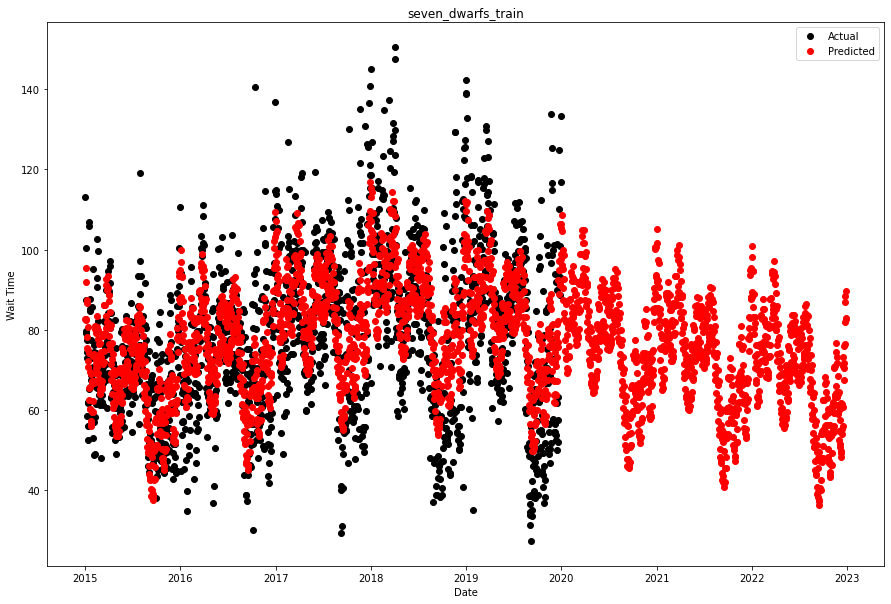

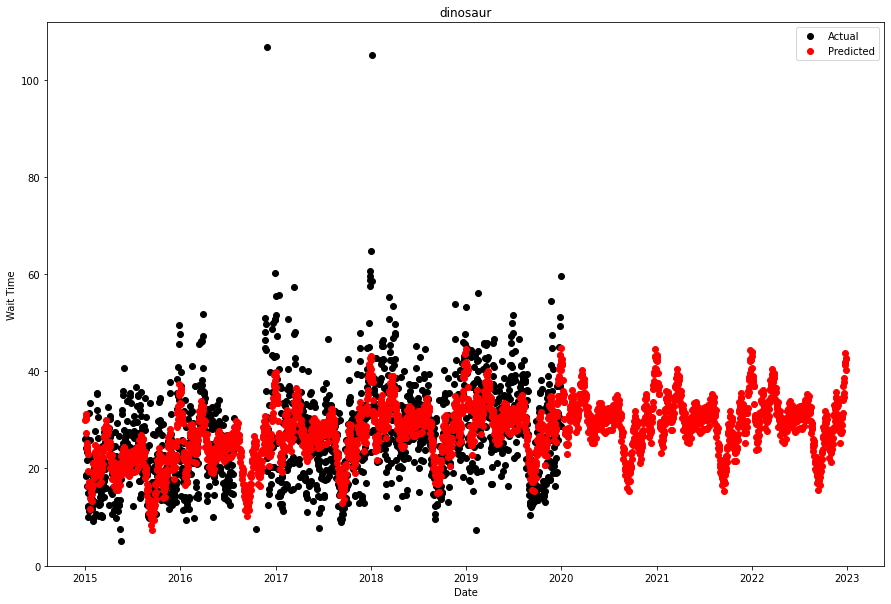

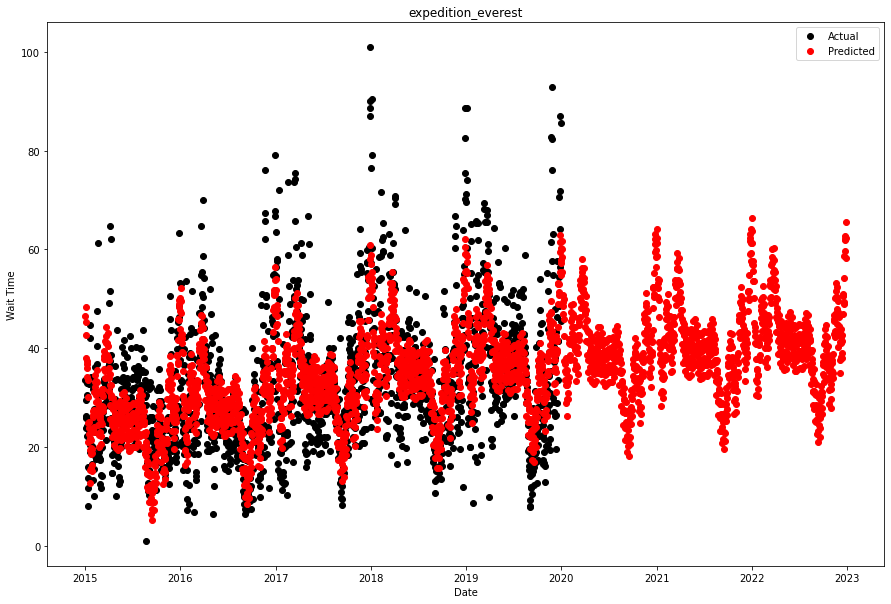

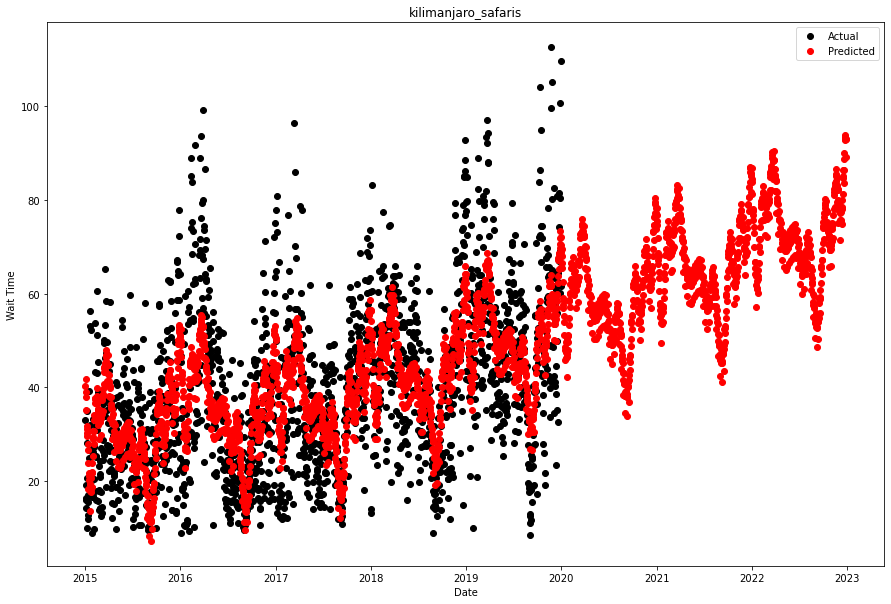

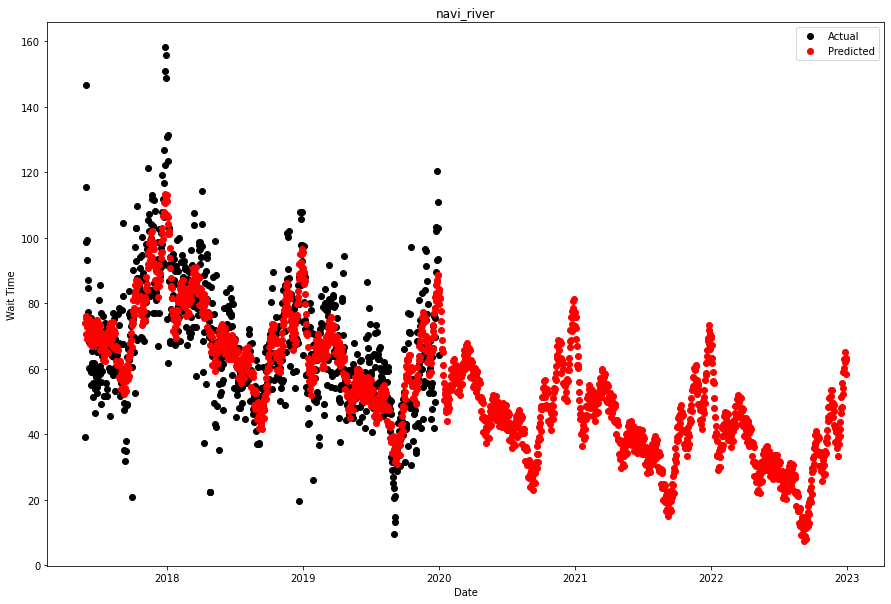

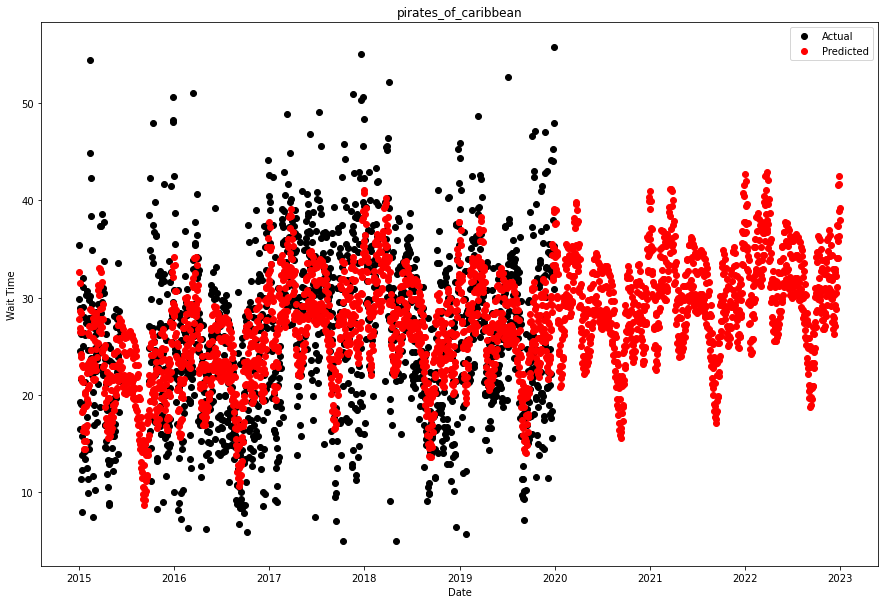

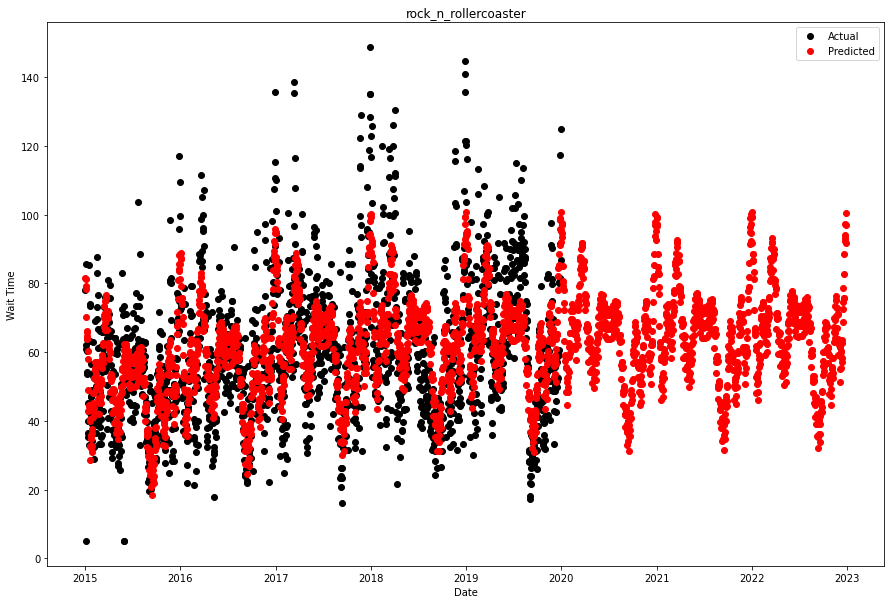

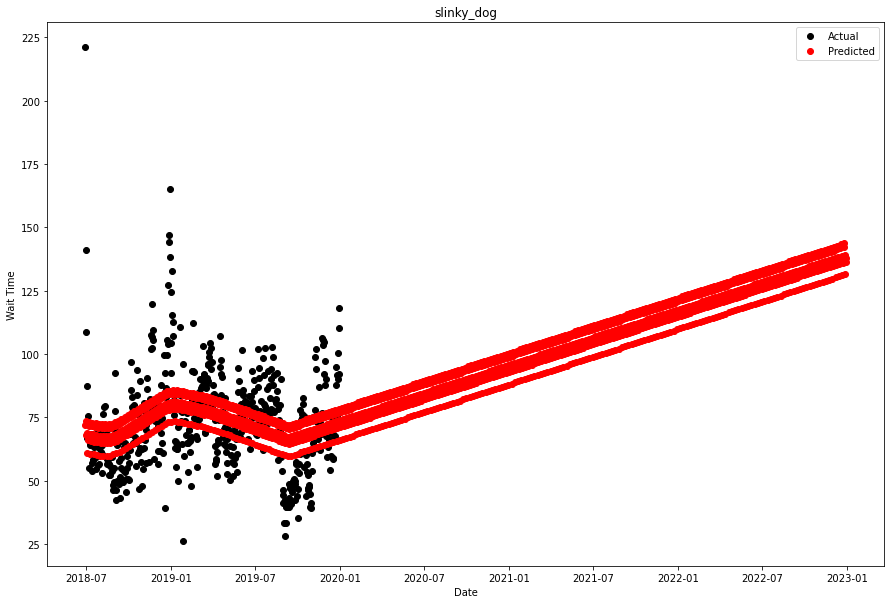

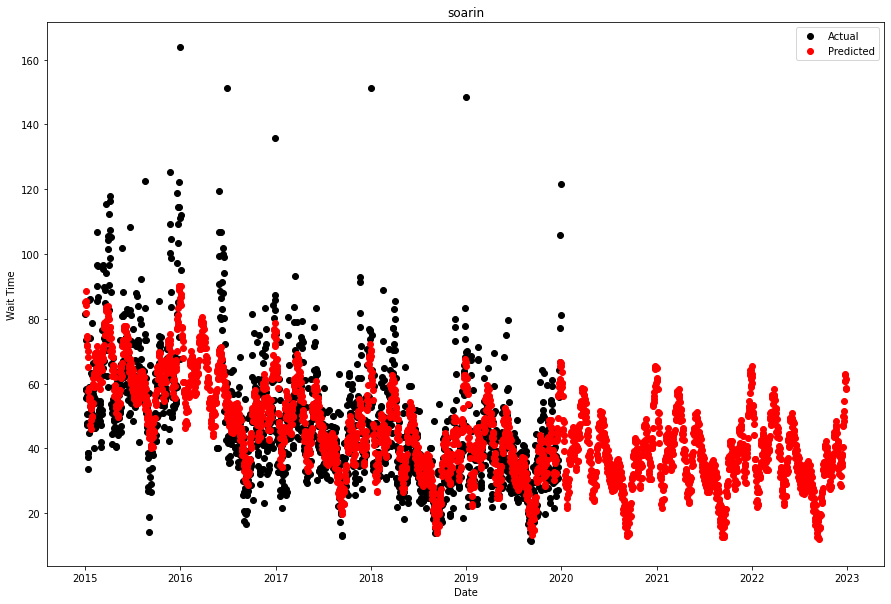

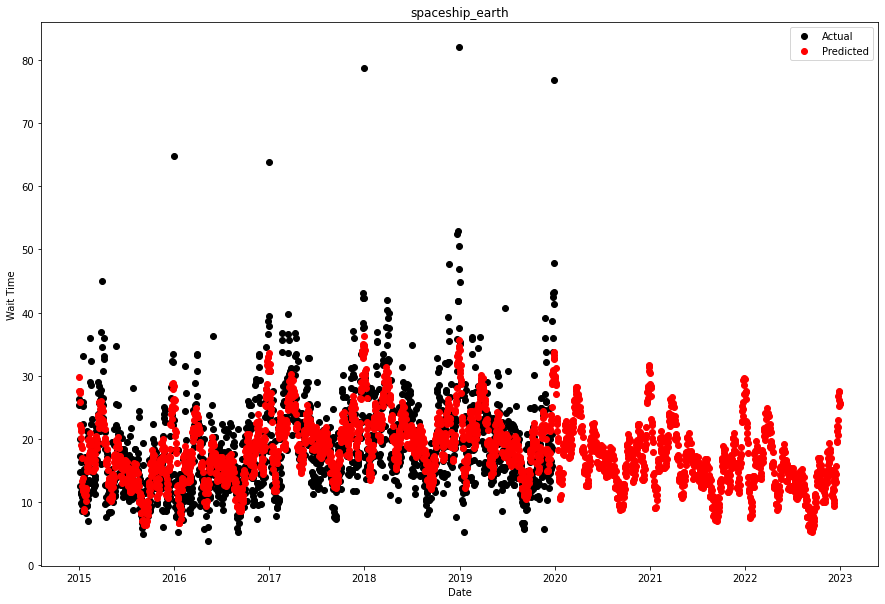

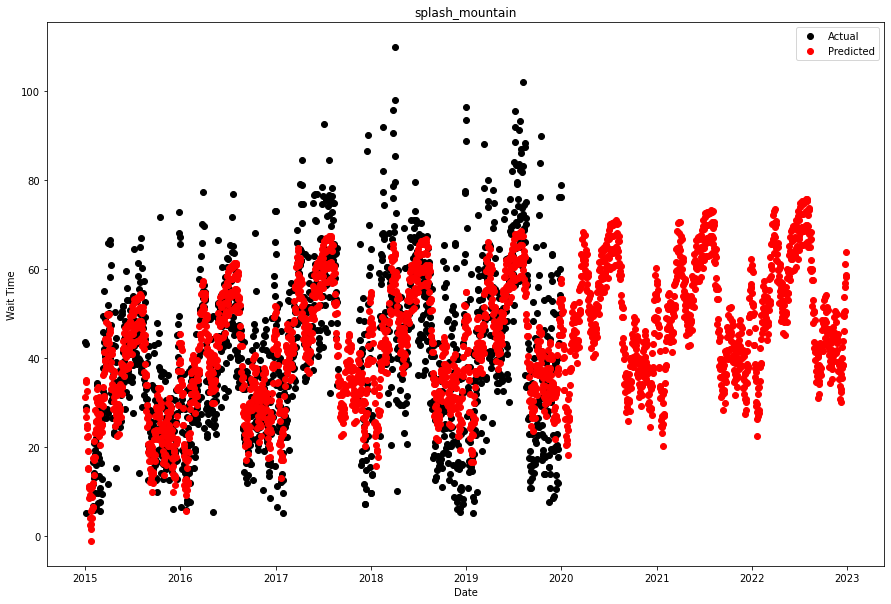

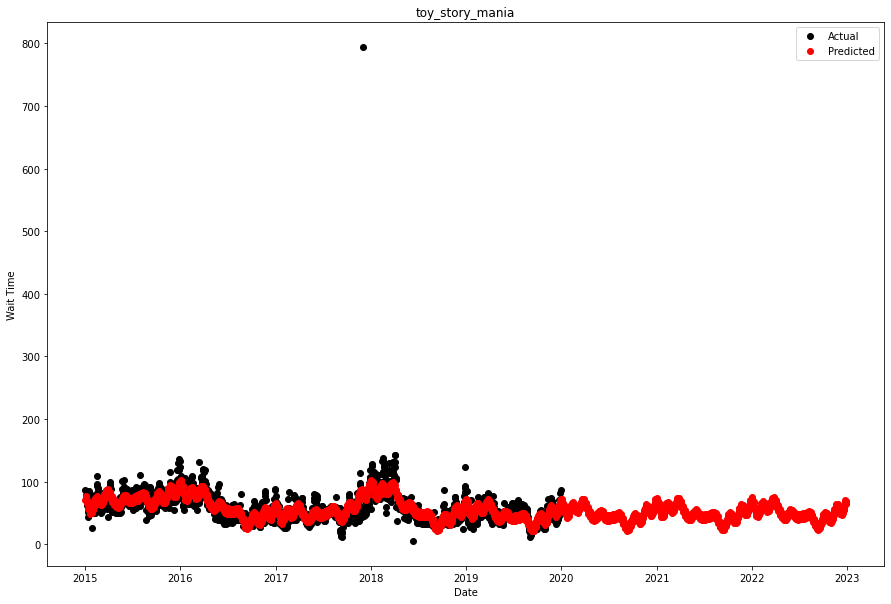

In [47]:
for i in data_sets:
    print(i)
    exec(f'plt.figure(figsize = (15,10))')
    exec(f'plt.plot_date(fb_data_{i}["ds"], fb_data_{i}["y"], color = "black")')
    exec(f'plt.plot_date(preds_{i}["ds"], preds_{i}["yhat"], color = "red")')
    exec(f'plt.xlabel("Date")')
    exec(f'plt.ylabel("Wait Time")')
    exec(f'plt.legend(["Actual", "Predicted"])')
    exec(f'plt.title("{i}")')

In [48]:
# plt.figure(figsize = (15,10))
# plt.plot_date(fb_data["ds"], fb_data["y"], color = "black")
# plt.plot_date(preds["ds"], preds["yhat"], color = "red")
# plt.xlabel("Date")
# plt.ylabel("Wait Time")
# plt.legend(["Actual", "Predicted"])
# plt.title("Dinosaur")

# plt.scatter(fb_data["y"])
# plt.scatter(np.arange(len(fb_data)), fb_data["y"], color = "black")
# plt.scatter(np.arange(len(fb_data), len(fb_data)+ len(preds)), preds["yhat"], color = "red")

seven_dwarfs_train
dinosaur
expedition_everest
kilimanjaro_safaris
navi_river
pirates_of_caribbean
rock_n_rollercoaster
slinky_dog
soarin
spaceship_earth
splash_mountain
toy_story_mania


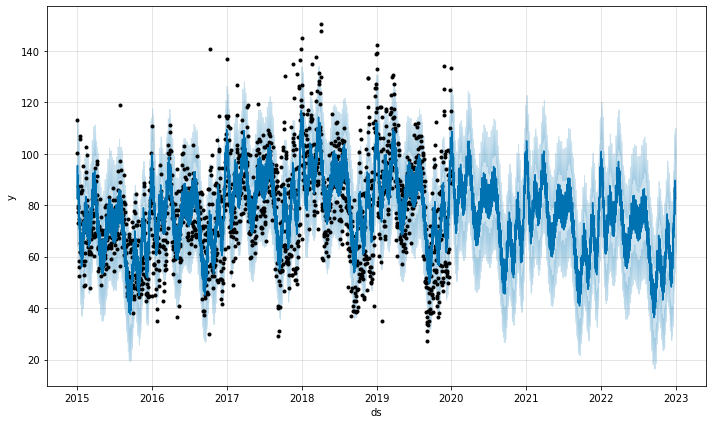

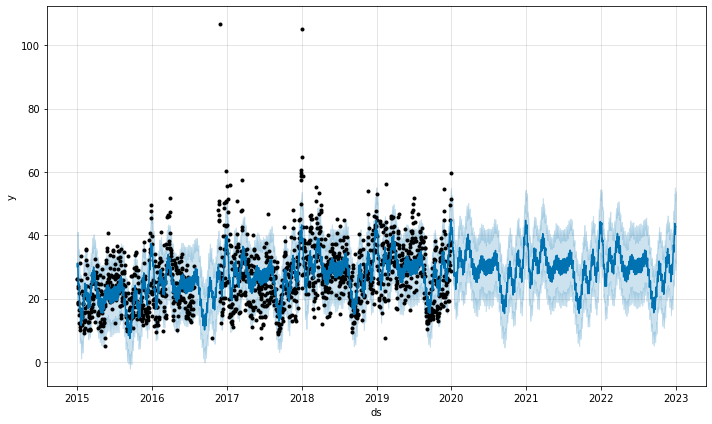

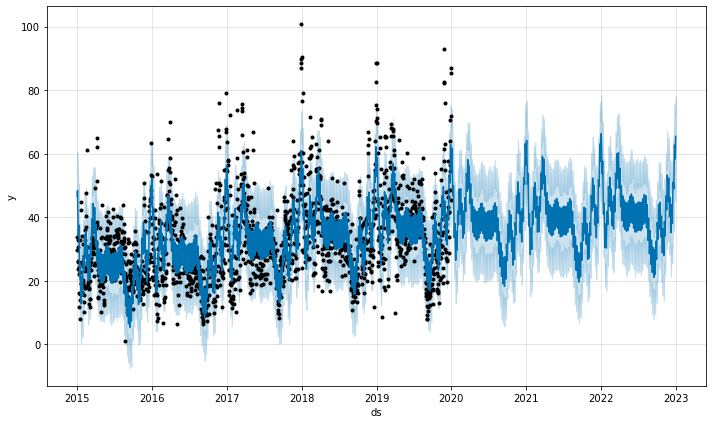

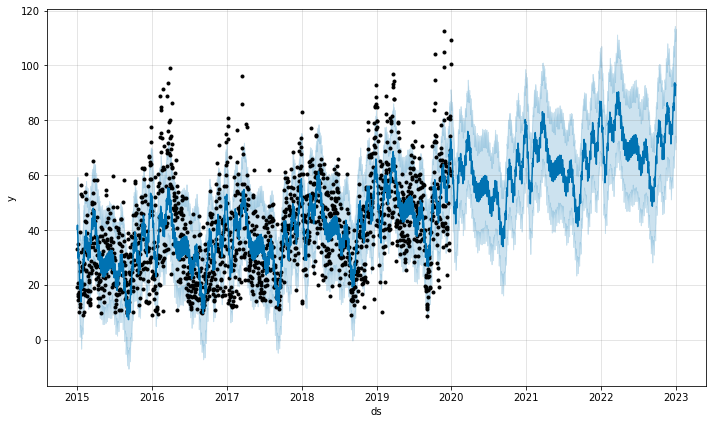

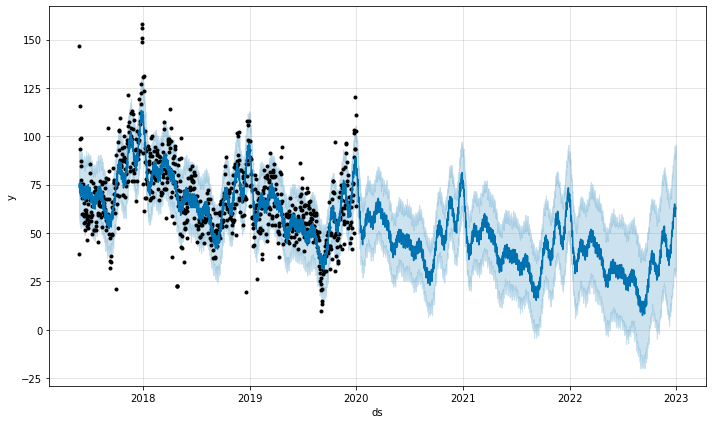

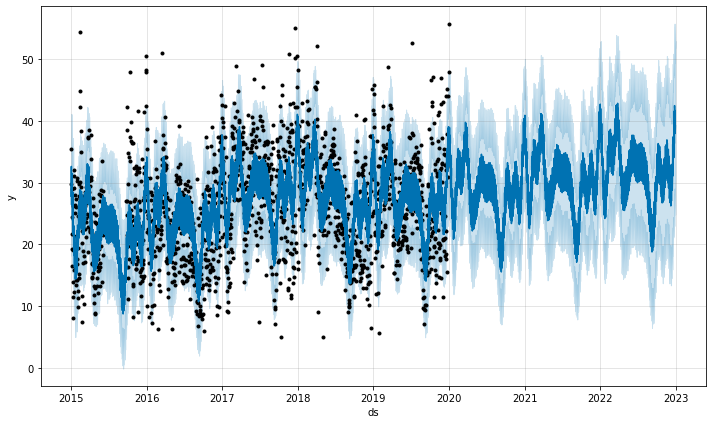

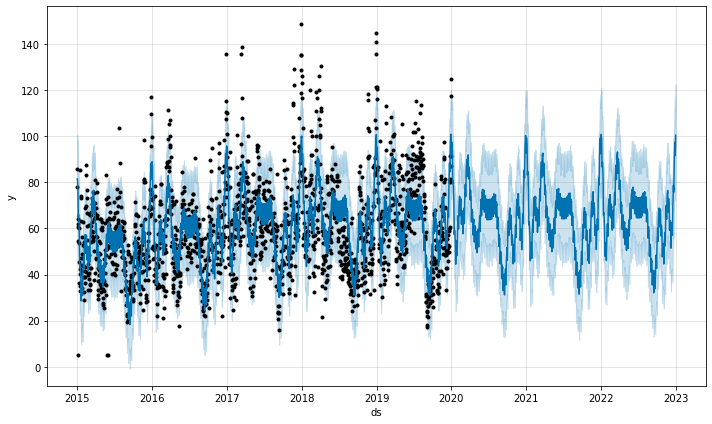

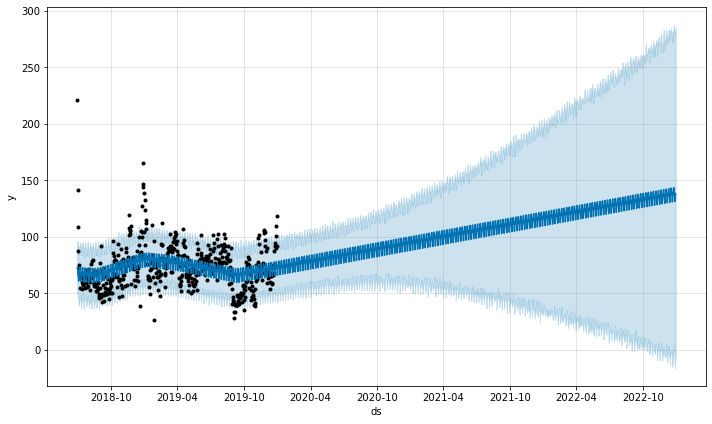

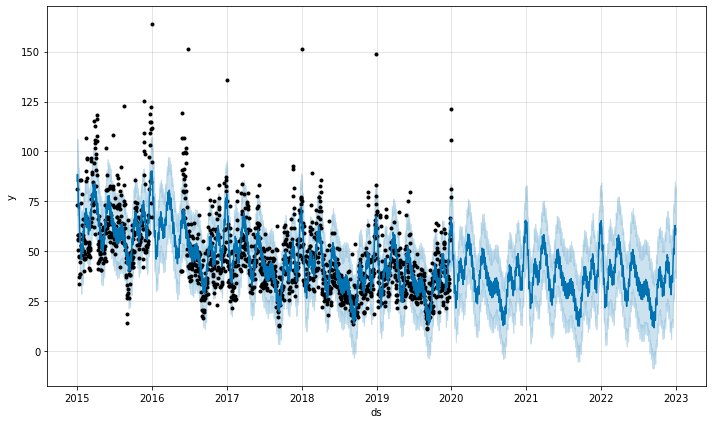

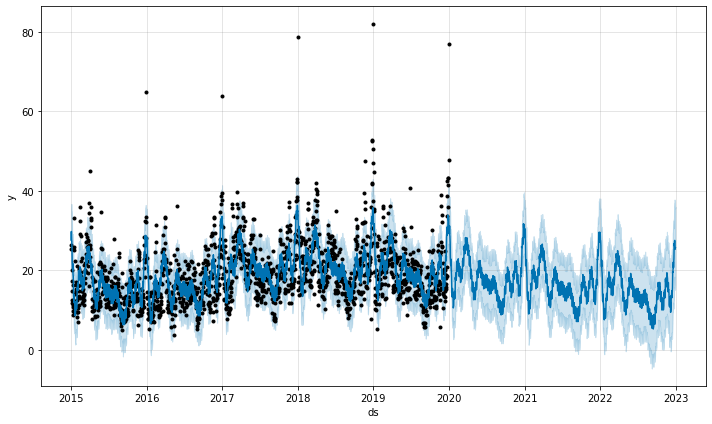

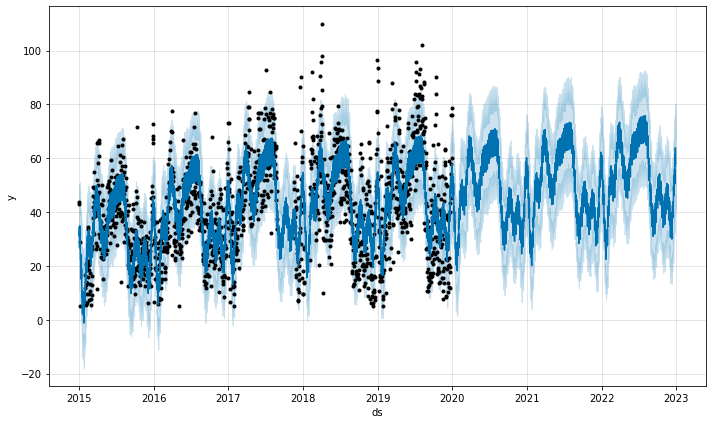

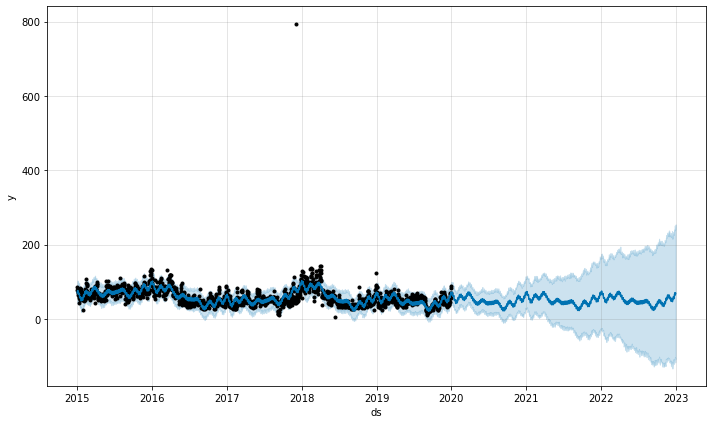

In [49]:
for i in data_sets:
    print(i)
    exec(f'm_{i}.plot(preds_{i})')

seven_dwarfs_train
dinosaur
expedition_everest
kilimanjaro_safaris
navi_river
pirates_of_caribbean
rock_n_rollercoaster
slinky_dog
soarin
spaceship_earth
splash_mountain
toy_story_mania


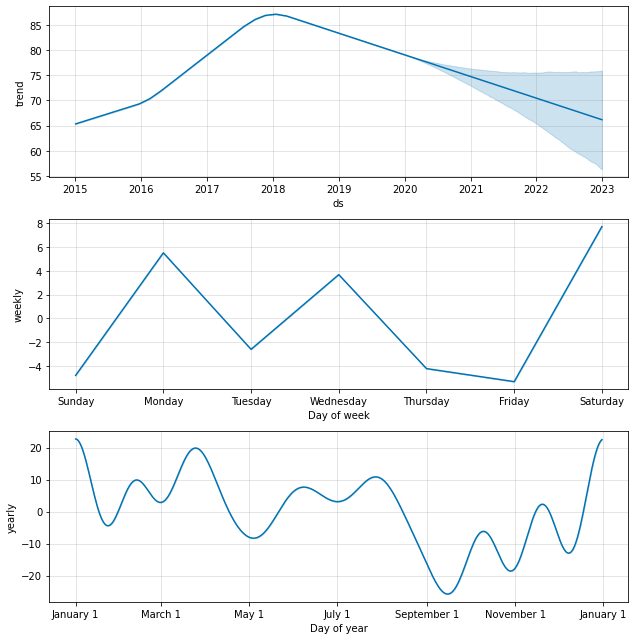

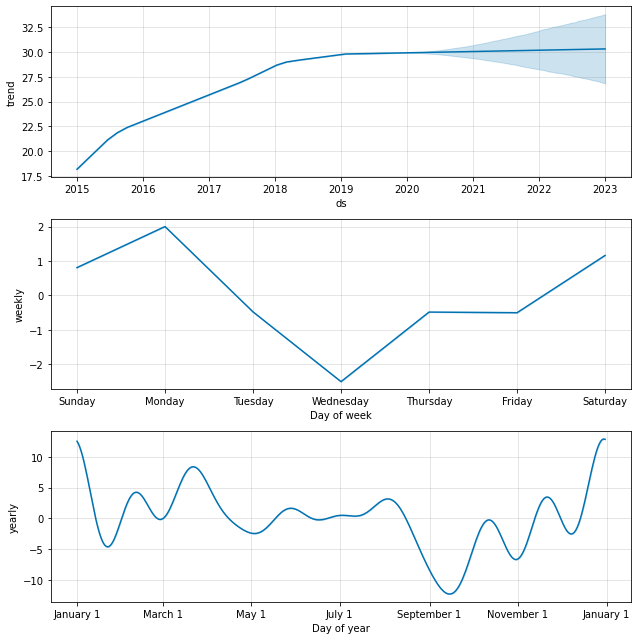

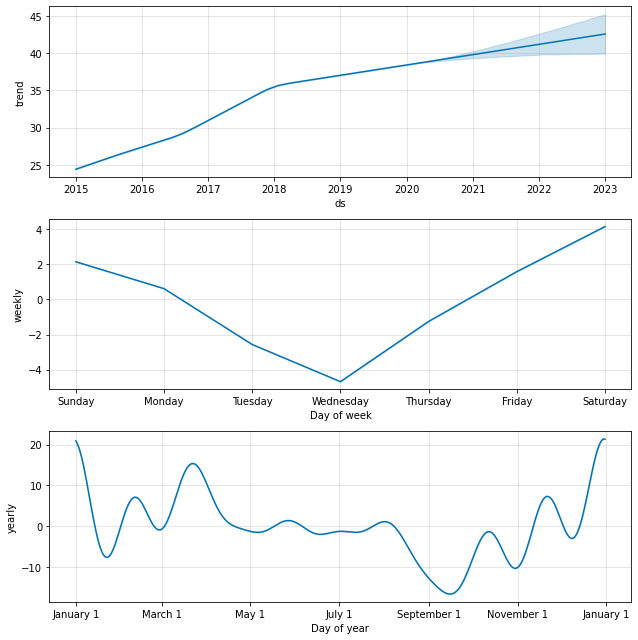

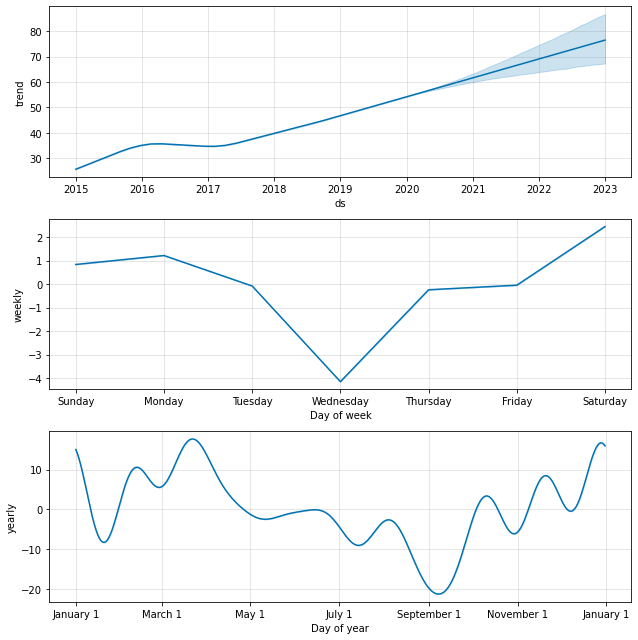

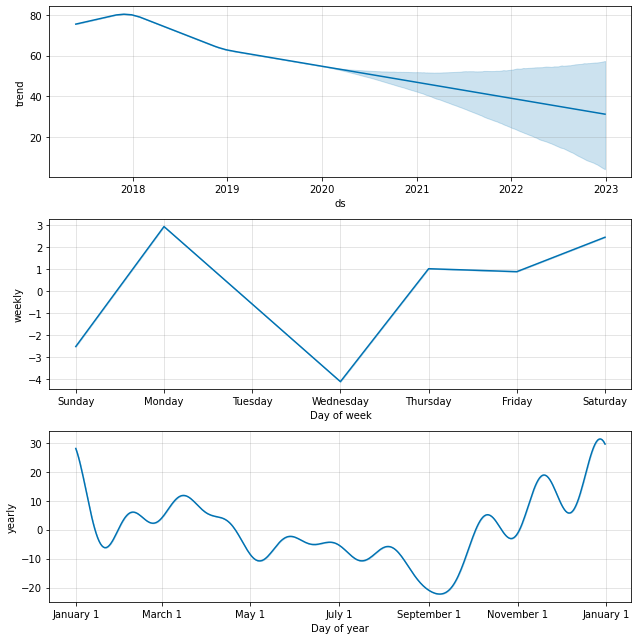

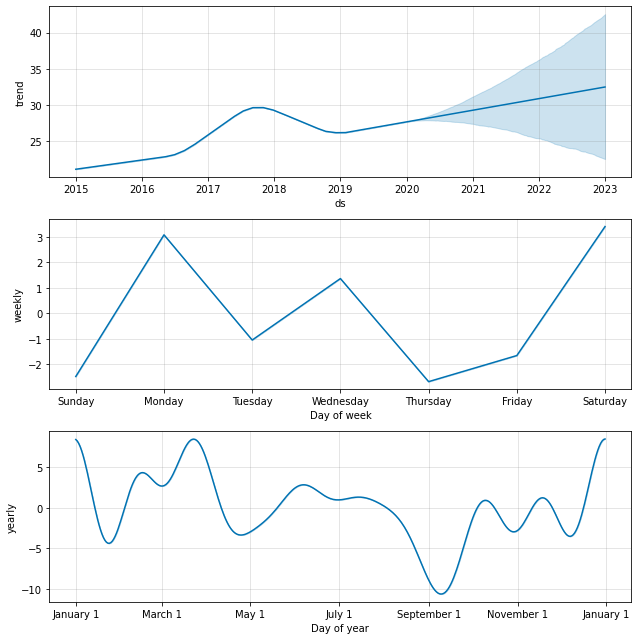

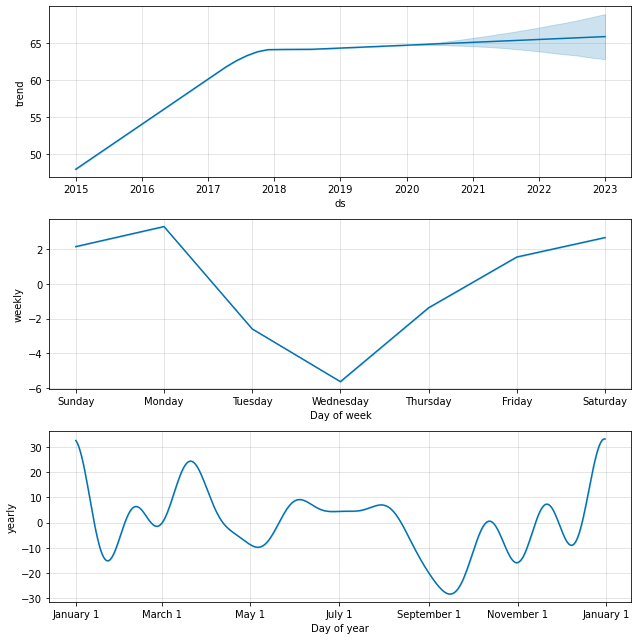

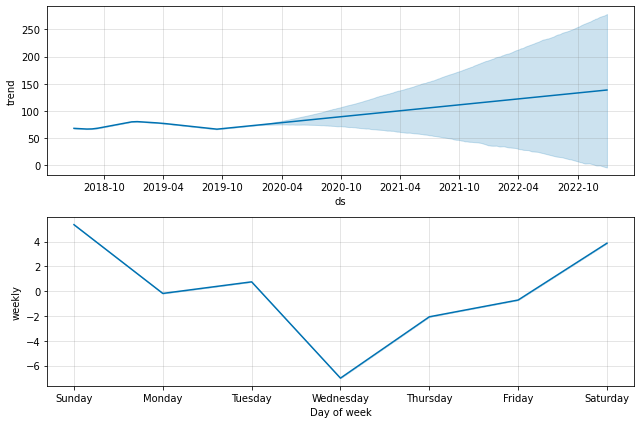

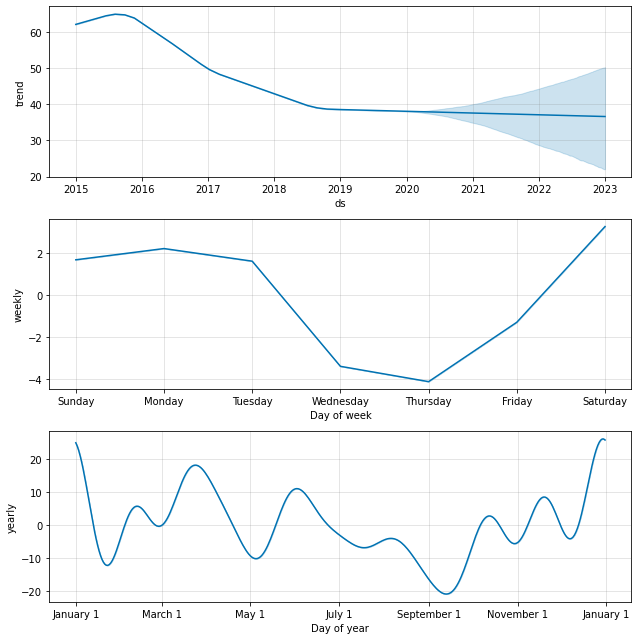

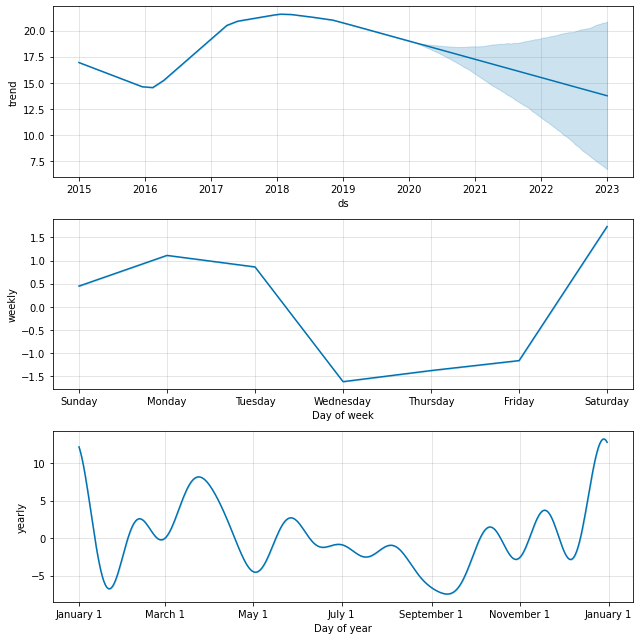

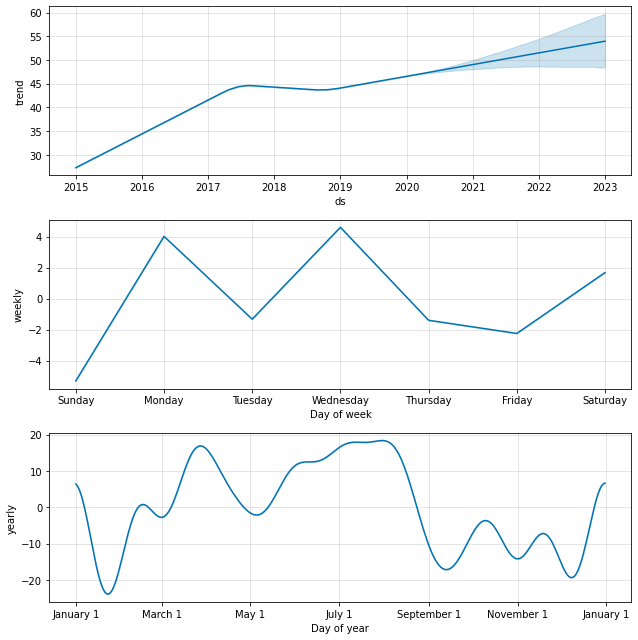

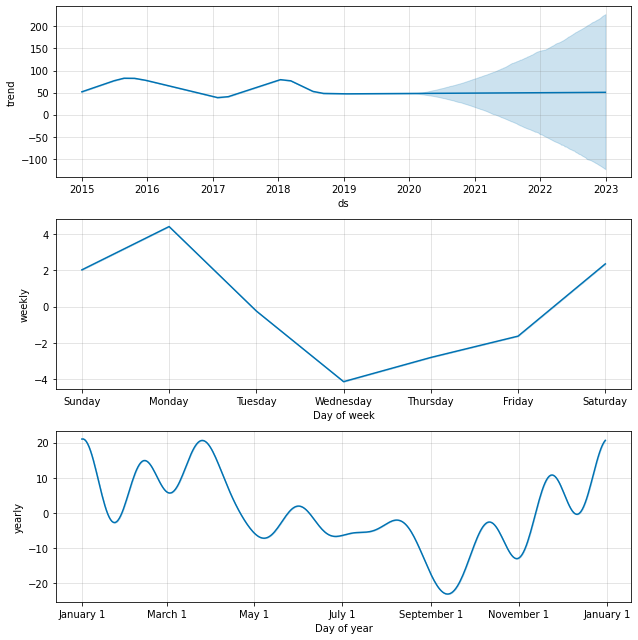

In [50]:
for i in data_sets:
    print(i)
    exec(f'm_{i}.plot_components(preds_{i})')

In [52]:
for i in data_sets:
    print(i)
    exec(f'forecast_{i} = preds_{i}.loc[len(fb_data_{i}):, :]')
    display(eval(f'forecast_{i}.loc[forecast_{i}["yhat"].idxmin, :]'))
    print(f'forecast_{i}.nsmallest(5, "yhat")[["ds", "yhat"]]')

seven_dwarfs_train


ds                            2022-09-16 00:00:00
trend                                     67.4001
yhat_lower                                16.5188
yhat_upper                                57.4593
trend_lower                               58.9106
trend_upper                               75.6455
additive_terms                           -31.0528
additive_terms_lower                     -31.0528
additive_terms_upper                     -31.0528
weekly                                   -5.32635
weekly_lower                             -5.32635
weekly_upper                             -5.32635
yearly                                   -25.7264
yearly_lower                             -25.7264
yearly_upper                             -25.7264
multiplicative_terms                            0
multiplicative_terms_lower                      0
multiplicative_terms_upper                      0
yhat                                      36.3473
Name: 2814, dtype: object

forecast_seven_dwarfs_train.nsmallest(5, "yhat")[["ds", "yhat"]]
dinosaur


ds                            2020-09-16 00:00:00
trend                                     30.0338
yhat_lower                                4.59941
yhat_upper                                25.3601
trend_lower                               29.6247
trend_upper                               30.4203
additive_terms                           -14.7325
additive_terms_lower                     -14.7325
additive_terms_upper                     -14.7325
weekly                                   -2.50383
weekly_lower                             -2.50383
weekly_upper                             -2.50383
yearly                                   -12.2287
yearly_lower                             -12.2287
yearly_upper                             -12.2287
multiplicative_terms                            0
multiplicative_terms_lower                      0
multiplicative_terms_upper                      0
yhat                                      15.3013
Name: 2084, dtype: object

forecast_dinosaur.nsmallest(5, "yhat")[["ds", "yhat"]]
expedition_everest


ds                            2020-09-16 00:00:00
trend                                     39.3884
yhat_lower                                5.59666
yhat_upper                                30.1126
trend_lower                               39.1044
trend_upper                               39.6417
additive_terms                           -21.1674
additive_terms_lower                     -21.1674
additive_terms_upper                     -21.1674
weekly                                   -4.68543
weekly_lower                             -4.68543
weekly_upper                             -4.68543
yearly                                    -16.482
yearly_lower                              -16.482
yearly_upper                              -16.482
multiplicative_terms                            0
multiplicative_terms_lower                      0
multiplicative_terms_upper                      0
yhat                                       18.221
Name: 2084, dtype: object

forecast_expedition_everest.nsmallest(5, "yhat")[["ds", "yhat"]]
kilimanjaro_safaris


ds                            2020-09-09 00:00:00
trend                                      59.337
yhat_lower                                16.1057
yhat_upper                                51.6534
trend_lower                               58.4133
trend_upper                               60.2759
additive_terms                           -25.3895
additive_terms_lower                     -25.3895
additive_terms_upper                     -25.3895
weekly                                   -4.14875
weekly_lower                             -4.14875
weekly_upper                             -4.14875
yearly                                   -21.2408
yearly_lower                             -21.2408
yearly_upper                             -21.2408
multiplicative_terms                            0
multiplicative_terms_lower                      0
multiplicative_terms_upper                      0
yhat                                      33.9475
Name: 2077, dtype: object

forecast_kilimanjaro_safaris.nsmallest(5, "yhat")[["ds", "yhat"]]
navi_river


ds                            2022-09-07 00:00:00
trend                                      33.673
yhat_lower                               -19.7917
yhat_upper                                36.1962
trend_lower                                11.423
trend_upper                               55.7432
additive_terms                            -26.292
additive_terms_lower                      -26.292
additive_terms_upper                      -26.292
weekly                                   -4.12279
weekly_lower                             -4.12279
weekly_upper                             -4.12279
yearly                                   -22.1692
yearly_lower                             -22.1692
yearly_upper                             -22.1692
multiplicative_terms                            0
multiplicative_terms_lower                      0
multiplicative_terms_upper                      0
yhat                                      7.38106
Name: 1930, dtype: object

forecast_navi_river.nsmallest(5, "yhat")[["ds", "yhat"]]
pirates_of_caribbean


ds                            2020-09-10 00:00:00
trend                                     28.8029
yhat_lower                                7.02875
yhat_upper                                24.3166
trend_lower                               27.7125
trend_upper                               29.8139
additive_terms                           -13.2641
additive_terms_lower                     -13.2641
additive_terms_upper                     -13.2641
weekly                                   -2.67714
weekly_lower                             -2.67714
weekly_upper                             -2.67714
yearly                                   -10.5869
yearly_lower                             -10.5869
yearly_upper                             -10.5869
multiplicative_terms                            0
multiplicative_terms_lower                      0
multiplicative_terms_upper                      0
yhat                                      15.5389
Name: 2078, dtype: object

forecast_pirates_of_caribbean.nsmallest(5, "yhat")[["ds", "yhat"]]
rock_n_rollercoaster


ds                            2020-09-16 00:00:00
trend                                     65.0008
yhat_lower                                12.7333
yhat_upper                                52.2202
trend_lower                               64.6797
trend_upper                               65.3539
additive_terms                           -33.8553
additive_terms_lower                     -33.8553
additive_terms_upper                     -33.8553
weekly                                   -5.62227
weekly_lower                             -5.62227
weekly_upper                             -5.62227
yearly                                    -28.233
yearly_lower                              -28.233
yearly_upper                              -28.233
multiplicative_terms                            0
multiplicative_terms_lower                      0
multiplicative_terms_upper                      0
yhat                                      31.1455
Name: 2084, dtype: object

forecast_rock_n_rollercoaster.nsmallest(5, "yhat")[["ds", "yhat"]]
slinky_dog


ds                            2020-01-01 00:00:00
trend                                     73.1202
yhat_lower                                42.4081
yhat_upper                                89.1207
trend_lower                               73.1202
trend_upper                               73.1202
additive_terms                           -7.01295
additive_terms_lower                     -7.01295
additive_terms_upper                     -7.01295
weekly                                   -7.01295
weekly_lower                             -7.01295
weekly_upper                             -7.01295
multiplicative_terms                            0
multiplicative_terms_lower                      0
multiplicative_terms_upper                      0
yhat                                      66.1073
Name: 550, dtype: object

forecast_slinky_dog.nsmallest(5, "yhat")[["ds", "yhat"]]
soarin


ds                            2022-09-15 00:00:00
trend                                     36.7468
yhat_lower                               -8.13799
yhat_upper                                33.7794
trend_lower                               24.0927
trend_upper                               48.3431
additive_terms                           -24.8686
additive_terms_lower                     -24.8686
additive_terms_upper                     -24.8686
weekly                                   -4.14051
weekly_lower                             -4.14051
weekly_upper                             -4.14051
yearly                                   -20.7281
yearly_lower                             -20.7281
yearly_upper                             -20.7281
multiplicative_terms                            0
multiplicative_terms_lower                      0
multiplicative_terms_upper                      0
yhat                                      11.8782
Name: 2813, dtype: object

forecast_soarin.nsmallest(5, "yhat")[["ds", "yhat"]]
spaceship_earth


ds                            2022-09-14 00:00:00
trend                                     14.2671
yhat_lower                                -4.0304
yhat_upper                                 15.005
trend_lower                               8.13498
trend_upper                               20.2235
additive_terms                           -9.02225
additive_terms_lower                     -9.02225
additive_terms_upper                     -9.02225
weekly                                   -1.61692
weekly_lower                             -1.61692
weekly_upper                             -1.61692
yearly                                   -7.40533
yearly_lower                             -7.40533
yearly_upper                             -7.40533
multiplicative_terms                            0
multiplicative_terms_lower                      0
multiplicative_terms_upper                      0
yhat                                      5.24483
Name: 2812, dtype: object

forecast_spaceship_earth.nsmallest(5, "yhat")[["ds", "yhat"]]
splash_mountain


ds                            2020-01-26 00:00:00
trend                                     46.7335
yhat_lower                                1.52308
yhat_upper                                33.7411
trend_lower                               46.7266
trend_upper                               46.7375
additive_terms                           -28.6047
additive_terms_lower                     -28.6047
additive_terms_upper                     -28.6047
weekly                                   -5.30944
weekly_lower                             -5.30944
weekly_upper                             -5.30944
yearly                                   -23.2953
yearly_lower                             -23.2953
yearly_upper                             -23.2953
multiplicative_terms                            0
multiplicative_terms_lower                      0
multiplicative_terms_upper                      0
yhat                                      18.1288
Name: 1850, dtype: object

forecast_splash_mountain.nsmallest(5, "yhat")[["ds", "yhat"]]
toy_story_mania


ds                            2020-09-09 00:00:00
trend                                     48.6075
yhat_lower                               -10.4402
yhat_upper                                56.6223
trend_lower                                31.536
trend_upper                               67.1897
additive_terms                           -26.8476
additive_terms_lower                     -26.8476
additive_terms_upper                     -26.8476
weekly                                   -4.12104
weekly_lower                             -4.12104
weekly_upper                             -4.12104
yearly                                   -22.7265
yearly_lower                             -22.7265
yearly_upper                             -22.7265
multiplicative_terms                            0
multiplicative_terms_lower                      0
multiplicative_terms_upper                      0
yhat                                        21.76
Name: 2077, dtype: object

forecast_toy_story_mania.nsmallest(5, "yhat")[["ds", "yhat"]]


In [ ]:
# forecast = preds.loc[len(fb_data):, :]
# display(forecast.loc[temp["yhat"].idxmin, :])
# print(forecast.nsmallest(10, "yhat")[["ds", "yhat"]])

In [ ]:
# from sklearn.neural_network import MLPRegressor

# model = MLPRegressor()
# model.fit(X, y)
# print(model.score(X, y))


In [ ]:
# from sklearn.neural_network import MLPRegressor
# from sklearn.datasets import make_regression
# from sklearn.model_selection import train_test_split

In [ ]:
# X = dinosaur_data.drop(columns = ["date", "datetime", "CleanTime"])
# y = dinosaur_data["CleanTime"]

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# regr = MLPRegressor(random_state=1).fit(X_train, y_train)
# regr.predict(X_test)
                                                    
# regr.score(X_test, y_test)

### Random Forest Model

#### Train Model

In [ ]:
# rf_model = RandomForestRegressor()
# rf_model.fit(X_train,y_train)

In [ ]:
# y_test_pred=rf_model.predict(X_test)
# test_accuracy=(y_test ==y_test_pred).sum() / len(y_test)
# print('Test Set accuracy: ',test_accuracy)

In [ ]:
# rf_model.score(X_test, y_test)